## Prepare Dependencies and Libraries

In [ ]:
!pip install ultralytics

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.0/1.0 MB 23.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 43.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 31.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 29.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [ ]:
!pip install natsort

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import timm
from ultralytics import YOLO
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from natsort import natsorted

Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


## Read Dataset

### Images

In [ ]:
# Define images path
abnormal_img_path = '/content/drive/MyDrive/dataset/images/images_v2/cropped/abnormal'
normal_img_path = '/content/drive/MyDrive/dataset/images/images_v2/cropped/normal'

In [ ]:
# Get and sort all images
normal_image_files = natsorted([f for f in os.listdir(normal_img_path) if f.lower().endswith(('.jpg', '.png'))])
abnormal_image_files = natsorted([f for f in os.listdir(abnormal_img_path) if f.lower().endswith(('.jpg', '.png'))])

# Get 2 first images
normal_images = [os.path.join(normal_img_path, f) for f in normal_image_files[:2]]
abnormal_images = [os.path.join(abnormal_img_path, f) for f in abnormal_image_files[26:29:2]]

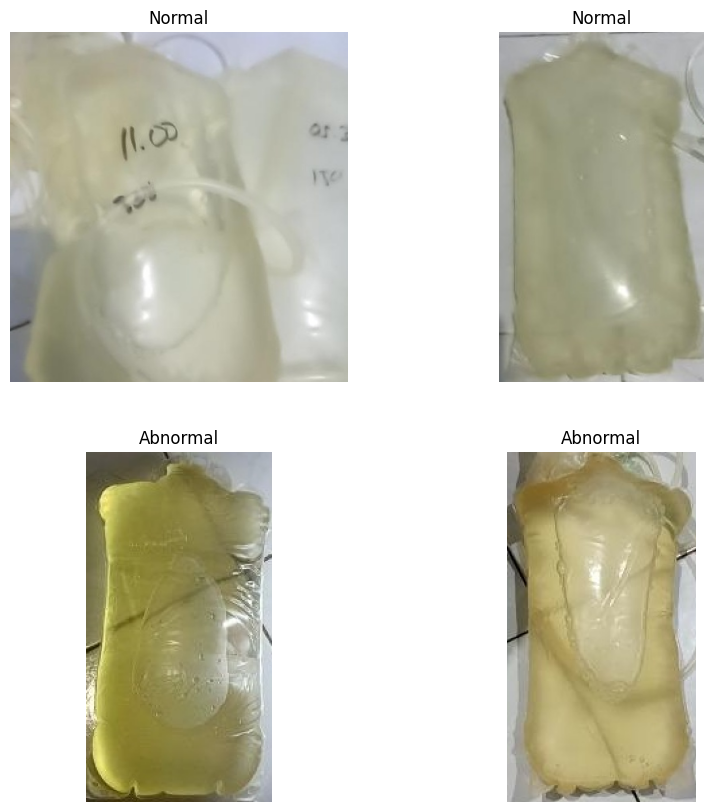

In [ ]:
# Visualize cropped images
image_paths = normal_images + abnormal_images

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, img_path in enumerate(image_paths):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    row = i // 2
    col = i % 2

    axes[row, col].imshow(img)
    axes[row, col].axis("off")
    axes[row, col].set_title("Normal" if row == 0 else "Abnormal")

plt.show()

### Klinis

In [ ]:
directory = '/content/drive/MyDrive/dataset/tabular/klinis/'

In [ ]:
normal_df = pd.read_csv(os.path.join(directory, "final_normal.csv"))
abnormal_df = pd.read_csv(os.path.join(directory, "final_abnormal.csv"))

In [ ]:
normal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 342 non-null    float64
 1   foto_cairan        342 non-null    object 
 2   durasi_masuk       342 non-null    float64
 3   foto_cairan_url    342 non-null    object 
 4   volume_masuk       342 non-null    float64
 5   volume_keluar      342 non-null    float64
 6   waktu_masuk        342 non-null    object 
 7   waktu_keluar       342 non-null    object 
 8   berat_badan        342 non-null    float64
 9   tekanan_darah_mm   342 non-null    float64
 10  tekanan_darah_hg   342 non-null    float64
 11  nadi               342 non-null    float64
 12  waktu_penggantian  342 non-null    object 
 13  volume             342 non-null    float64
 14  jenis_kelamin      342 non-null    object 
 15  kondisi            342 non-null    object 
dtypes: float64(9), object(7)
m

In [ ]:
abnormal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 41 non-null     float64
 1   foto_cairan        41 non-null     object 
 2   durasi_masuk       41 non-null     float64
 3   foto_cairan_url    41 non-null     object 
 4   volume_masuk       41 non-null     float64
 5   volume_keluar      41 non-null     float64
 6   waktu_masuk        41 non-null     object 
 7   waktu_keluar       41 non-null     object 
 8   berat_badan        41 non-null     float64
 9   tekanan_darah_mm   41 non-null     float64
 10  tekanan_darah_hg   41 non-null     float64
 11  nadi               41 non-null     float64
 12  waktu_penggantian  41 non-null     object 
 13  volume             41 non-null     float64
 14  jenis_kelamin      41 non-null     object 
 15  kondisi            41 non-null     object 
dtypes: float64(9), object(7)
mem

## Exploratory Data Analysis

### Images

1. cek ukuran semua dataset
2. jumlah masing2 class

In [ ]:
def get_image_sizes(folder_path, label):
    # Use natsorted for natural sorting based on numeric parts in filenames
    image_files = natsorted([f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))])
    data = []
    for img_file in image_files:
        img_path = os.path.join(folder_path, img_file)
        with Image.open(img_path) as img:
            width, height = img.size
            data.append([img_file, width, height, label])
    return data

# Ambil ukuran gambar dari folder
abnormal_data = get_image_sizes(abnormal_img_path, "abnormal")
normal_data = get_image_sizes(normal_img_path, "normal")

# Gabungkan ke dalam DataFrame
image_size_df = pd.DataFrame(abnormal_data + normal_data, columns=["Filename", "Width", "Height", "Category"])

In [ ]:
image_size_df

Filename  Width  Height  Category
0    abnormal-0.jpg    179     267  abnormal
1    abnormal-1.jpg    202     308  abnormal
2    abnormal-2.jpg    178     306  abnormal
3    abnormal-3.jpg    279     322  abnormal
4    abnormal-4.jpg    200     289  abnormal
..              ...    ...     ...       ...
460  normal-337.jpg    386     386    normal
461  normal-338.jpg    291     376    normal
462  normal-339.jpg    391     391    normal
463  normal-340.jpg    381     202    normal
464  normal-341.jpg    388     255    normal

[465 rows x 4 columns]

<ipython-input-11-7200bb45551f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette=['blue', 'red'])


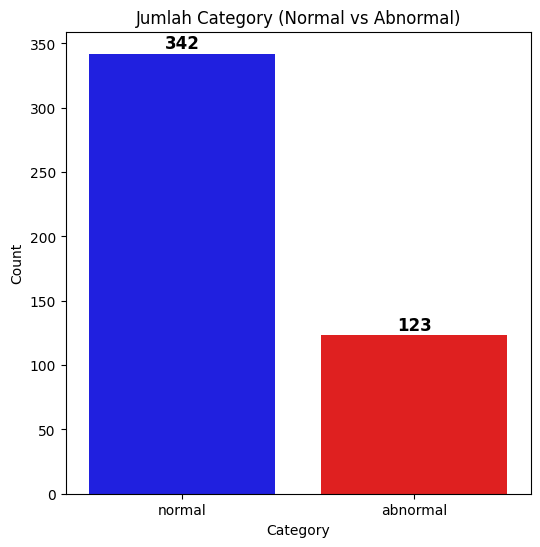

In [ ]:
category_counts = image_size_df['Category'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette=['blue', 'red'])

# Menambahkan angka di atas bar
for i, value in enumerate(category_counts.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Labeling
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Jumlah Category (Normal vs Abnormal)")

plt.show()

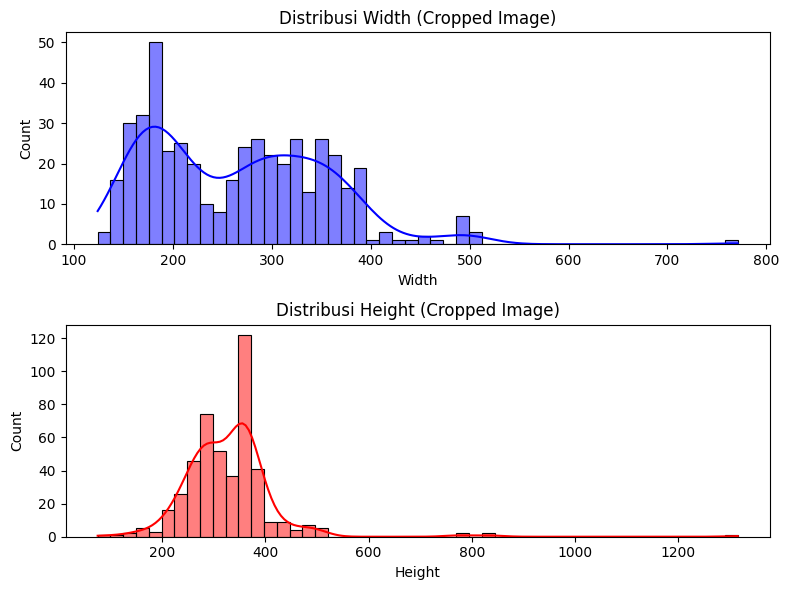

In [ ]:
plt.figure(figsize=(8, 6))  # Lebarkan figure agar lebih jelas

# Histogram untuk Width (image_size_df)
plt.subplot(2, 1, 1)
sns.histplot(image_size_df['Width'], bins=50, kde=True, color='blue')
plt.xlabel("Width")
plt.ylabel("Count")
plt.title("Distribusi Width (Cropped Image)")

# Histogram untuk Height (image_size_df)
plt.subplot(2, 1, 2)
sns.histplot(image_size_df['Height'], bins=50, kde=True, color='red')
plt.xlabel("Height")
plt.ylabel("Count")
plt.title("Distribusi Height (Cropped Image)")

plt.tight_layout()
plt.show()


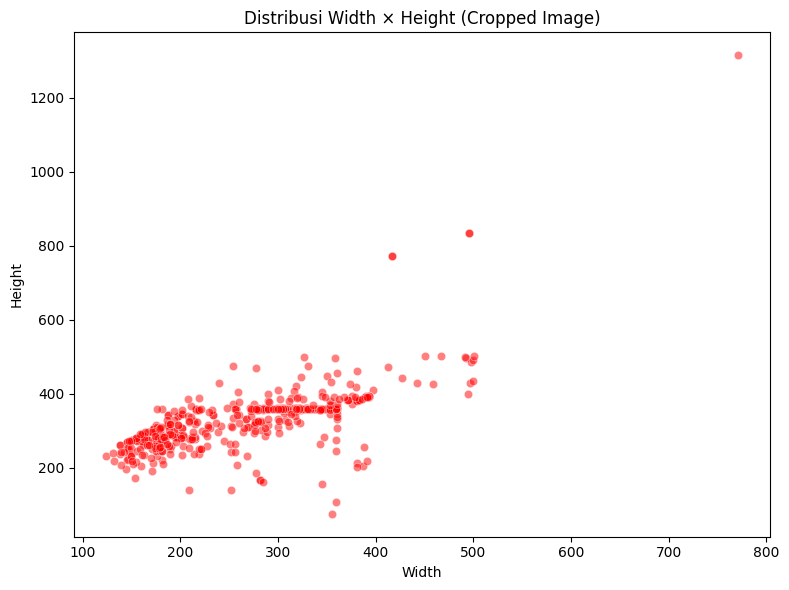

In [ ]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=image_size_df['Width'], y=image_size_df['Height'], alpha=0.5, color='red')
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Distribusi Width √ó Height (Cropped Image)")

plt.tight_layout()
plt.show()


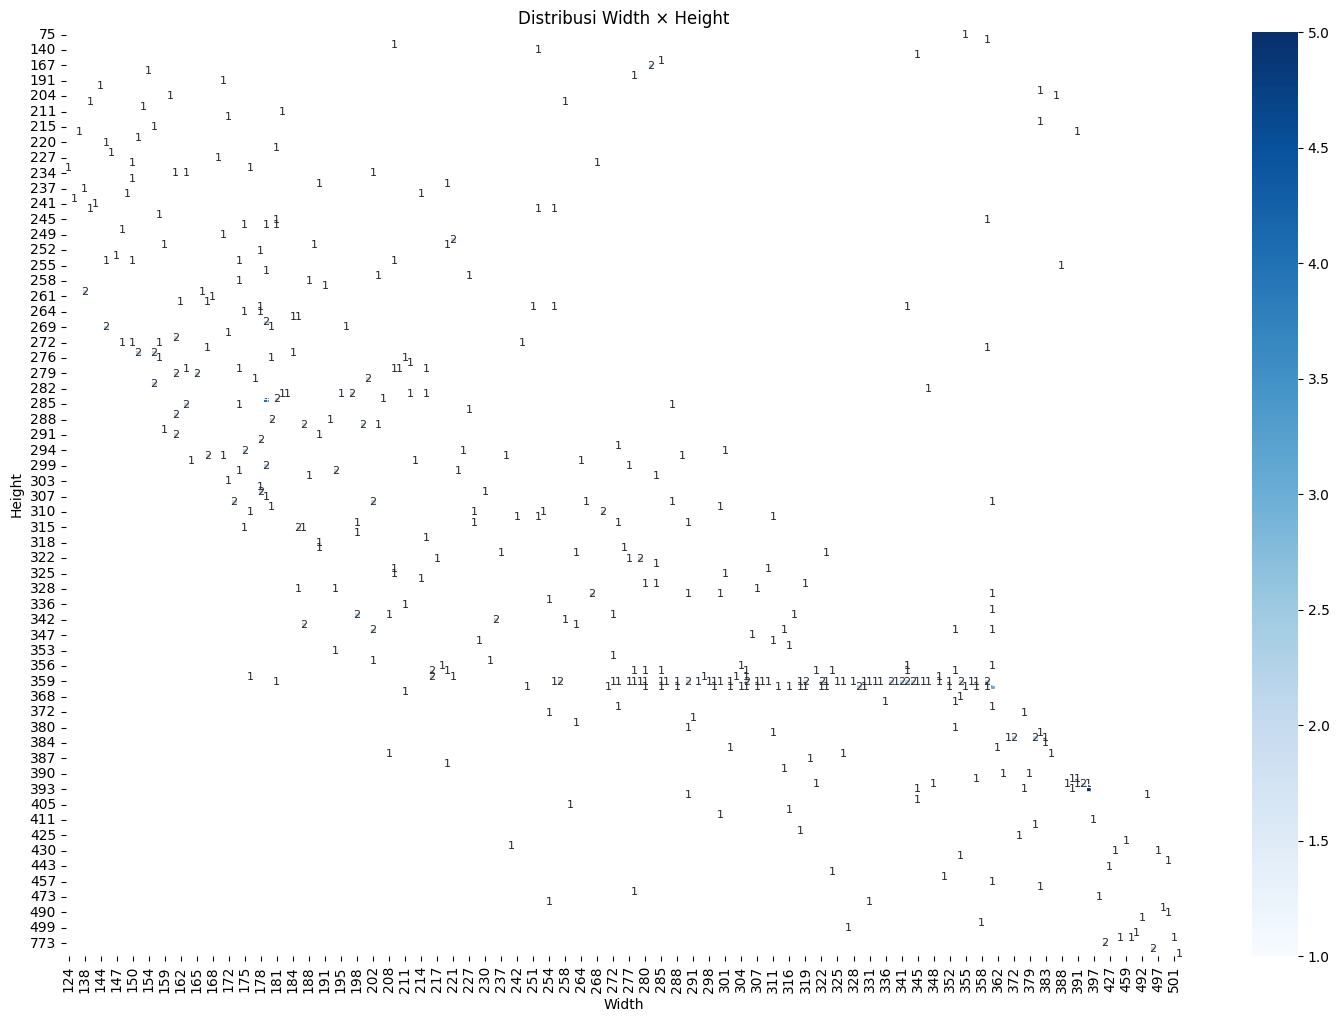

In [ ]:
# Hitung jumlah kemunculan setiap pasangan (width, height)
size_counts = image_size_df.groupby(['Width', 'Height']).size().reset_index(name='count')

# Pivot tabel agar cocok untuk heatmap
size_pivot = size_counts.pivot(index='Height', columns='Width', values='count')

plt.figure(figsize=(18, 12))
sns.heatmap(size_pivot, cmap="Blues", linewidths=0.5, annot=True, annot_kws={"size": 8}, fmt=".0f")

plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Distribusi Width √ó Height")
plt.show()

### Klinis

1. statistic deskriptif
2. distribusi feature
3. outlier
4. null
5. heatmap

In [ ]:
normal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 342 non-null    float64
 1   foto_cairan        342 non-null    object 
 2   durasi_masuk       342 non-null    float64
 3   foto_cairan_url    342 non-null    object 
 4   volume_masuk       342 non-null    float64
 5   volume_keluar      342 non-null    float64
 6   waktu_masuk        342 non-null    object 
 7   waktu_keluar       342 non-null    object 
 8   berat_badan        342 non-null    float64
 9   tekanan_darah_mm   342 non-null    float64
 10  tekanan_darah_hg   342 non-null    float64
 11  nadi               342 non-null    float64
 12  waktu_penggantian  342 non-null    object 
 13  volume             342 non-null    float64
 14  jenis_kelamin      342 non-null    object 
 15  kondisi            342 non-null    object 
dtypes: float64(9), object(7)
m

In [ ]:
abnormal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 41 non-null     float64
 1   foto_cairan        41 non-null     object 
 2   durasi_masuk       41 non-null     float64
 3   foto_cairan_url    41 non-null     object 
 4   volume_masuk       41 non-null     float64
 5   volume_keluar      41 non-null     float64
 6   waktu_masuk        41 non-null     object 
 7   waktu_keluar       41 non-null     object 
 8   berat_badan        41 non-null     float64
 9   tekanan_darah_mm   41 non-null     float64
 10  tekanan_darah_hg   41 non-null     float64
 11  nadi               41 non-null     float64
 12  waktu_penggantian  41 non-null     object 
 13  volume             41 non-null     float64
 14  jenis_kelamin      41 non-null     object 
 15  kondisi            41 non-null     object 
dtypes: float64(9), object(7)
mem

In [ ]:
normal_df.describe()

id  durasi_masuk  volume_masuk  volume_keluar  berat_badan  \
count   342.000000    342.000000    342.000000     342.000000   342.000000   
mean   3632.883041     12.523392   1661.570175    1884.947368    65.094327   
std    1573.130684      5.857374    442.445960     496.394452    12.466349   
min    1424.000000      1.000000      1.000000       1.000000    45.000000   
25%    2398.250000     10.000000   1500.000000    1600.000000    51.000000   
50%    3160.500000     10.000000   1800.000000    2000.000000    61.000000   
75%    4893.750000     15.000000   2000.000000    2200.000000    78.600000   
max    7550.000000     40.000000   2000.000000    3000.000000    84.000000   

       tekanan_darah_mm  tekanan_darah_hg        nadi       volume  
count        342.000000        342.000000  342.000000   342.000000  
mean         134.596491         82.377193   78.380117  1604.385965  
std           20.633822         10.759480   14.881604   470.051538  
min           83.000000         58.000000   57.000000   200.000000  
25%          124.000000         76.000000   67.000000  1500.000000  
50%          133.000000         83.000000   75.000000  1500.000000  
75%          144.000000         88.750000   92.000000  2000.000000  
max          200.000000        120.000000  114.000000  2000.000000

In [ ]:
abnormal_df.describe()

id  durasi_masuk  volume_masuk  volume_keluar  berat_badan  \
count    41.000000     41.000000     41.000000      41.000000    41.000000   
mean   3077.609756      5.707317   1063.414634    1237.926829    62.490976   
std     760.040686      2.182245    304.759001     398.937614     9.957671   
min    1613.000000      5.000000    500.000000     200.000000    47.350000   
25%    2318.000000      5.000000   1000.000000    1050.000000    48.580000   
50%    3251.000000      5.000000   1000.000000    1150.000000    68.000000   
75%    3469.000000      5.000000   1000.000000    1350.000000    68.000000   
max    5910.000000     15.000000   2000.000000    2200.000000    80.000000   

       tekanan_darah_mm  tekanan_darah_hg        nadi       volume  
count         41.000000         41.000000   41.000000    41.000000  
mean         156.682927         94.682927   69.146341  1136.585366  
std           15.824726          6.186433   13.587790   250.754958  
min          122.000000         80.000000   57.000000   800.000000  
25%          143.000000         90.000000   58.000000  1000.000000  
50%          161.000000         95.000000   67.000000  1000.000000  
75%          168.000000         99.000000   79.000000  1300.000000  
max          178.000000        105.000000  103.000000  2000.000000

In [ ]:
merged_df = pd.concat([normal_df, abnormal_df], ignore_index=True)
merged_df

id                       foto_cairan  durasi_masuk  \
0    1424.0  de6f8f42c8628f05c07acbf6caad7d33          15.0   
1    1574.0  2584a92e69b013df51e97e823e927ae8          15.0   
2    1575.0  5f6c91d5f58bc9b32719cf8c7c50fcfd          15.0   
3    1576.0  5b6d5e274e6787b835334936902ec63e          15.0   
4    1540.0  a42e2f6fbb07979c3663001d8cdeb491          15.0   
..      ...                               ...           ...   
378  3664.0  912ff63fec7b79d6dd180de8f6ef79bc           5.0   
379  3677.0  b5ce42e1186b1f35e3bd44ca20120bba           5.0   
380  3682.0  85fa15d15bf33bbba659b951e9c9a942           5.0   
381  3686.0  341859d537d156d9ca1df1528da79c24           5.0   
382  5910.0  e1d2b98ee74897fe1513f21f97a09f53           5.0   

                                       foto_cairan_url  volume_masuk  \
0    https://storage-api.its.ac.id/public/220024688...        1500.0   
1    https://storage-api.its.ac.id/public/220024688...        1500.0   
2    https://storage-api.its.ac.id/public/220024688...        1500.0   
3    https://storage-api.its.ac.id/public/220024688...        1500.0   
4    https://storage-api.its.ac.id/public/220024688...        1500.0   
..                                                 ...           ...   
378  https://storage-api.its.ac.id/public/220024688...        1000.0   
379  https://storage-api.its.ac.id/public/220024688...        1000.0   
380  https://storage-api.its.ac.id/public/220024688...        1000.0   
381  https://storage-api.its.ac.id/public/220024688...        1000.0   
382  https://storage-api.its.ac.id/public/220024688...        1000.0   

     volume_keluar          waktu_masuk         waktu_keluar  berat_badan  \
0           1800.0  2025-04-24 05:45:00  2025-04-24 11:00:00         52.0   
1           1600.0  2025-04-24 11:15:00  2025-04-24 17:00:00         51.0   
2           1500.0  2025-04-24 17:15:00  2025-04-24 21:30:00         51.0   
3           1650.0  2025-04-24 21:45:00  2025-04-24 05:30:00         51.0   
4           1900.0  2025-04-24 21:15:00  2025-04-24 05:45:00         51.0   
..             ...                  ...                  ...          ...   
378         1000.0  2025-04-24 04:50:00  2025-04-24 10:19:00         69.0   
379         1150.0  2025-04-24 10:25:00  2025-04-24 16:00:00         69.0   
380         1200.0  2025-04-24 16:13:00  2025-04-24 21:17:00         69.0   
381         1100.0  2025-04-24 21:30:00  2025-04-24 04:15:00         69.0   
382         1350.0  2025-04-24 11:05:00  2025-04-24 16:00:00         52.0   

     tekanan_darah_mm  tekanan_darah_hg  nadi    waktu_penggantian  volume  \
0               134.0              85.0  67.0  2025-04-24 05:30:00  1500.0   
1               136.0              96.0  65.0  2025-04-24 11:00:00  1500.0   
2               136.0              96.0  65.0  2025-04-24 17:00:00  1500.0   
3               136.0              96.0  65.0  2025-04-24 22:00:00  1500.0   
4               130.0              90.0  70.0  2025-04-24 22:00:00  1500.0   
..                ...               ...   ...                  ...     ...   
378             168.0             105.0  68.0  2025-04-24 04:00:00  1000.0   
379             168.0             105.0  68.0  2025-04-24 10:00:00  1000.0   
380             168.0             105.0  68.0  2025-04-24 16:00:00  1000.0   
381             168.0             105.0  68.0  2025-04-24 22:00:00  1000.0   
382             137.0              80.0  74.0  2025-04-24 05:40:00   800.0   

    jenis_kelamin kondisi  
0               L  normal  
1               L  normal  
2               L  normal  
3               L  normal  
4               L  normal  
..            ...     ...  
378             L  normal  
379             L  normal  
380             L  normal  
381             L  normal  
382             L  normal  

[383 rows x 16 columns]

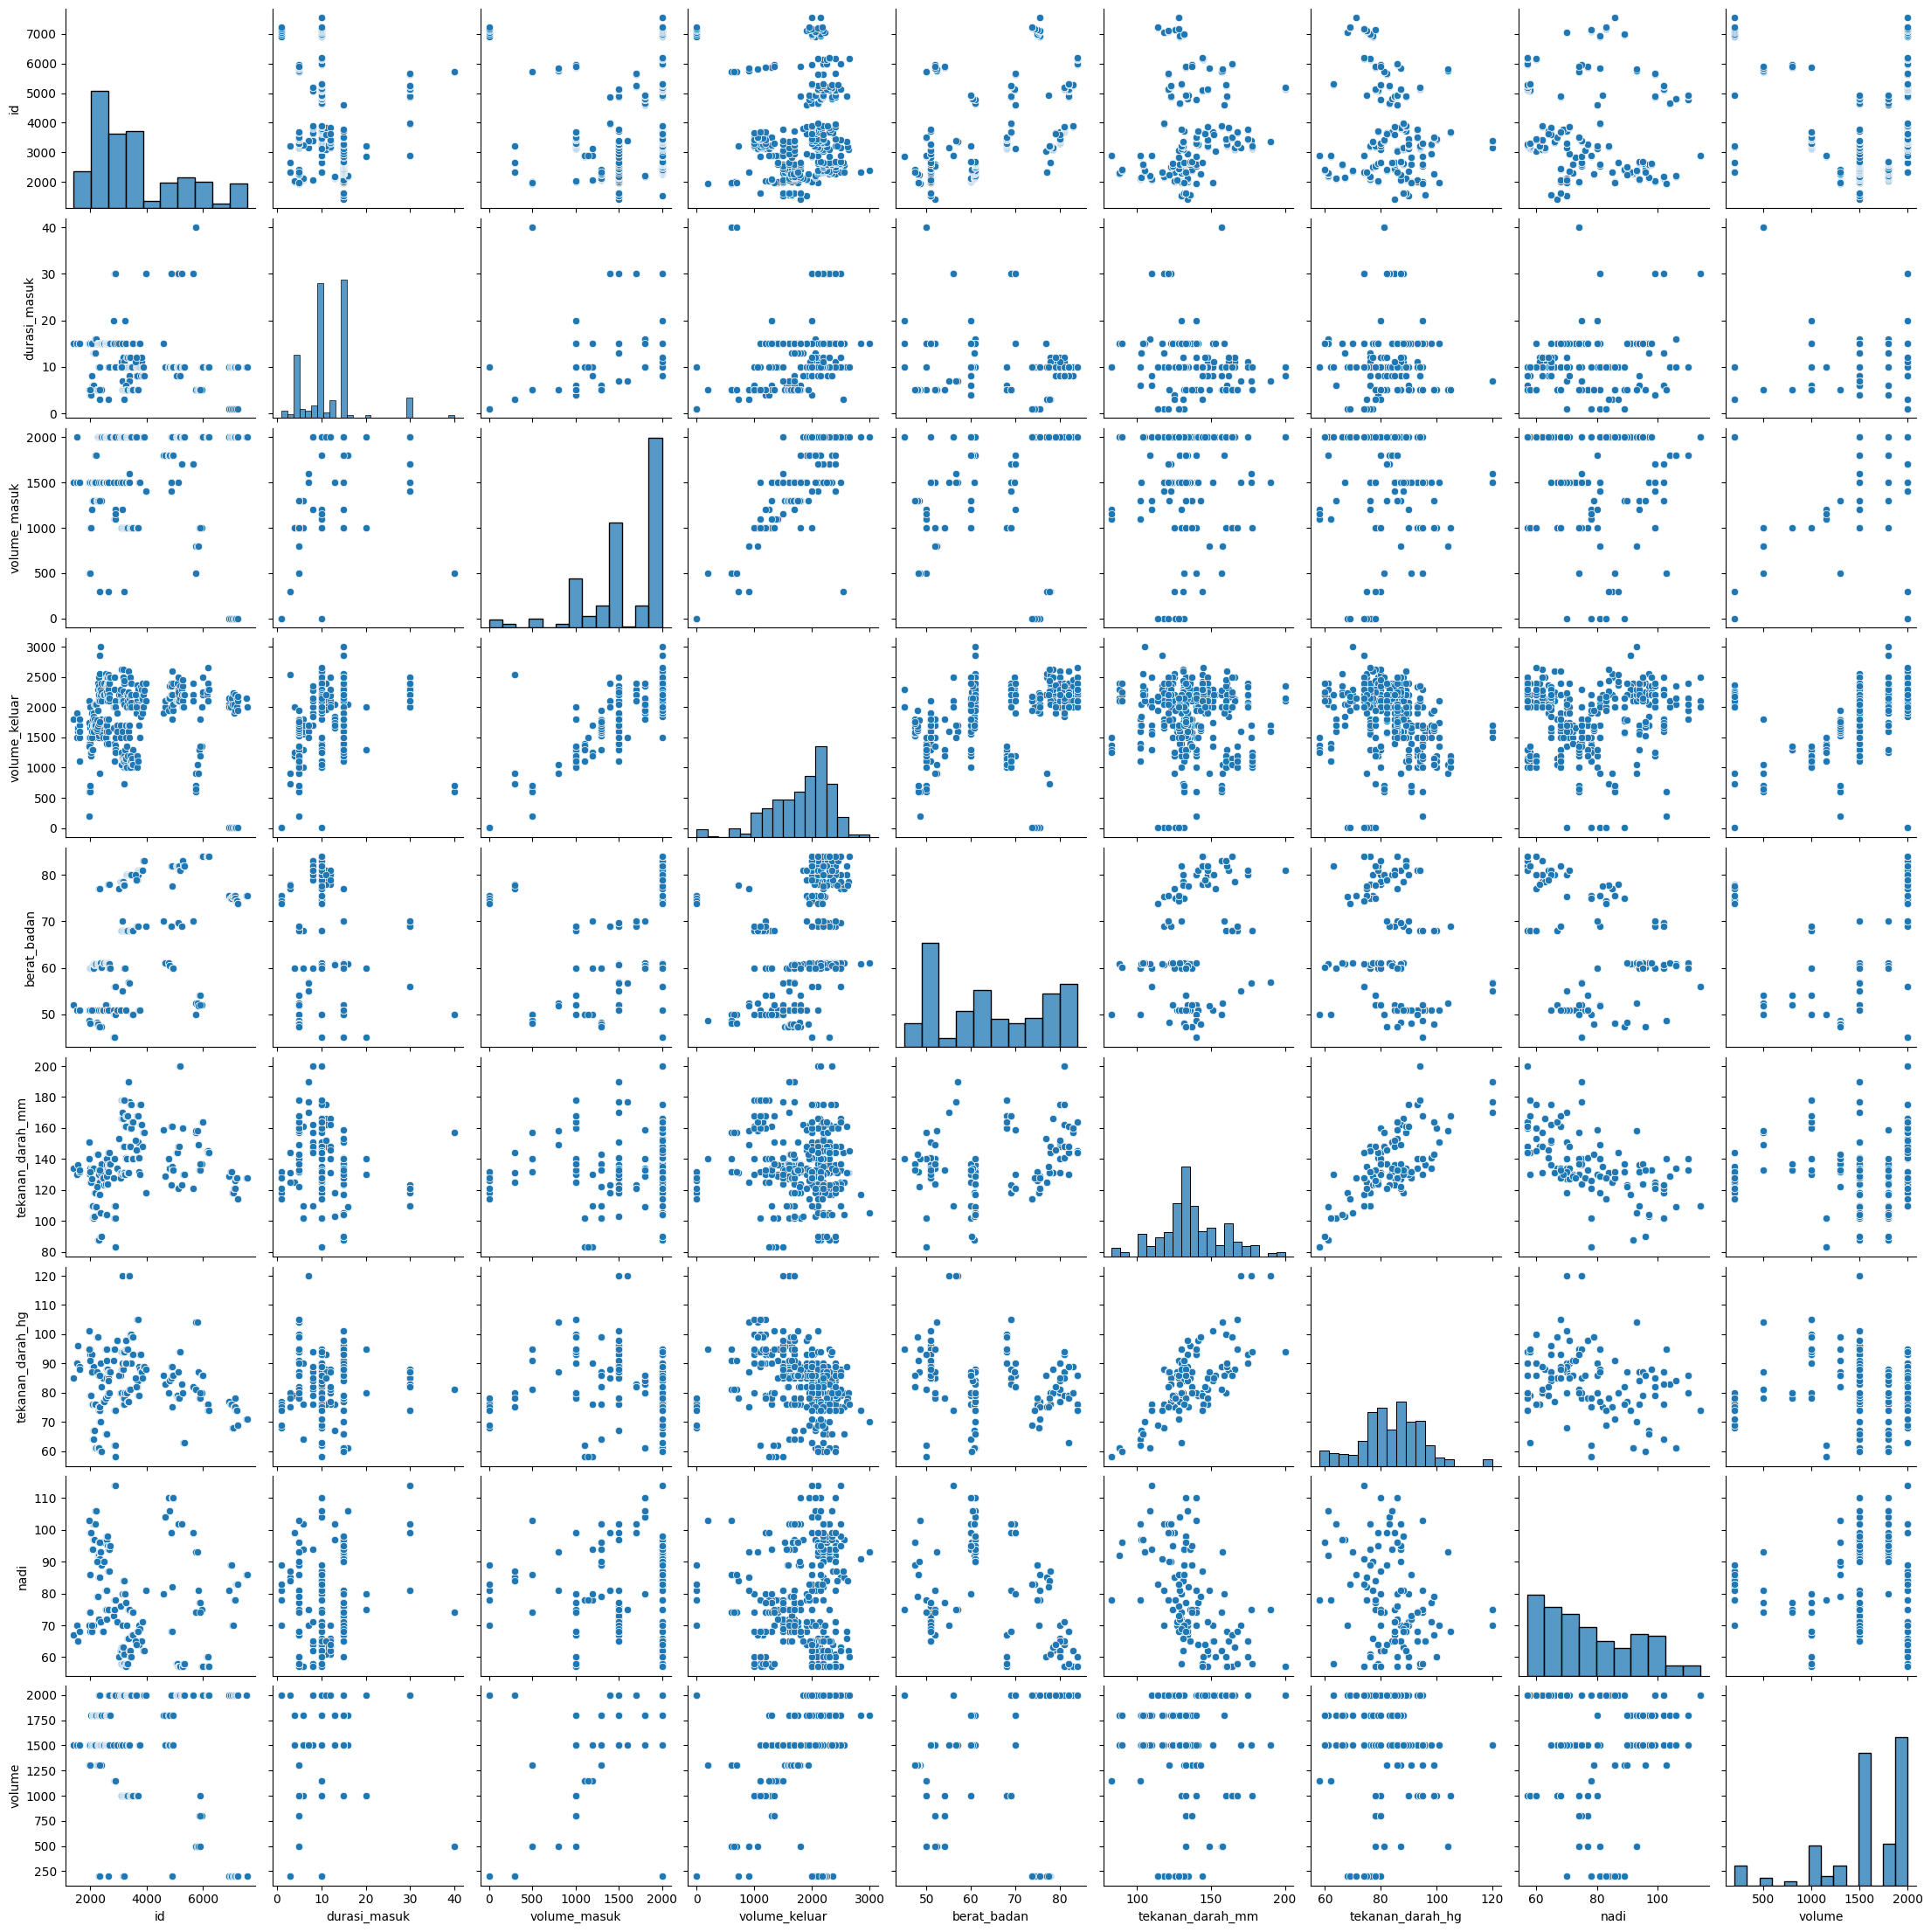

In [ ]:
sns.pairplot(merged_df)
plt.show()

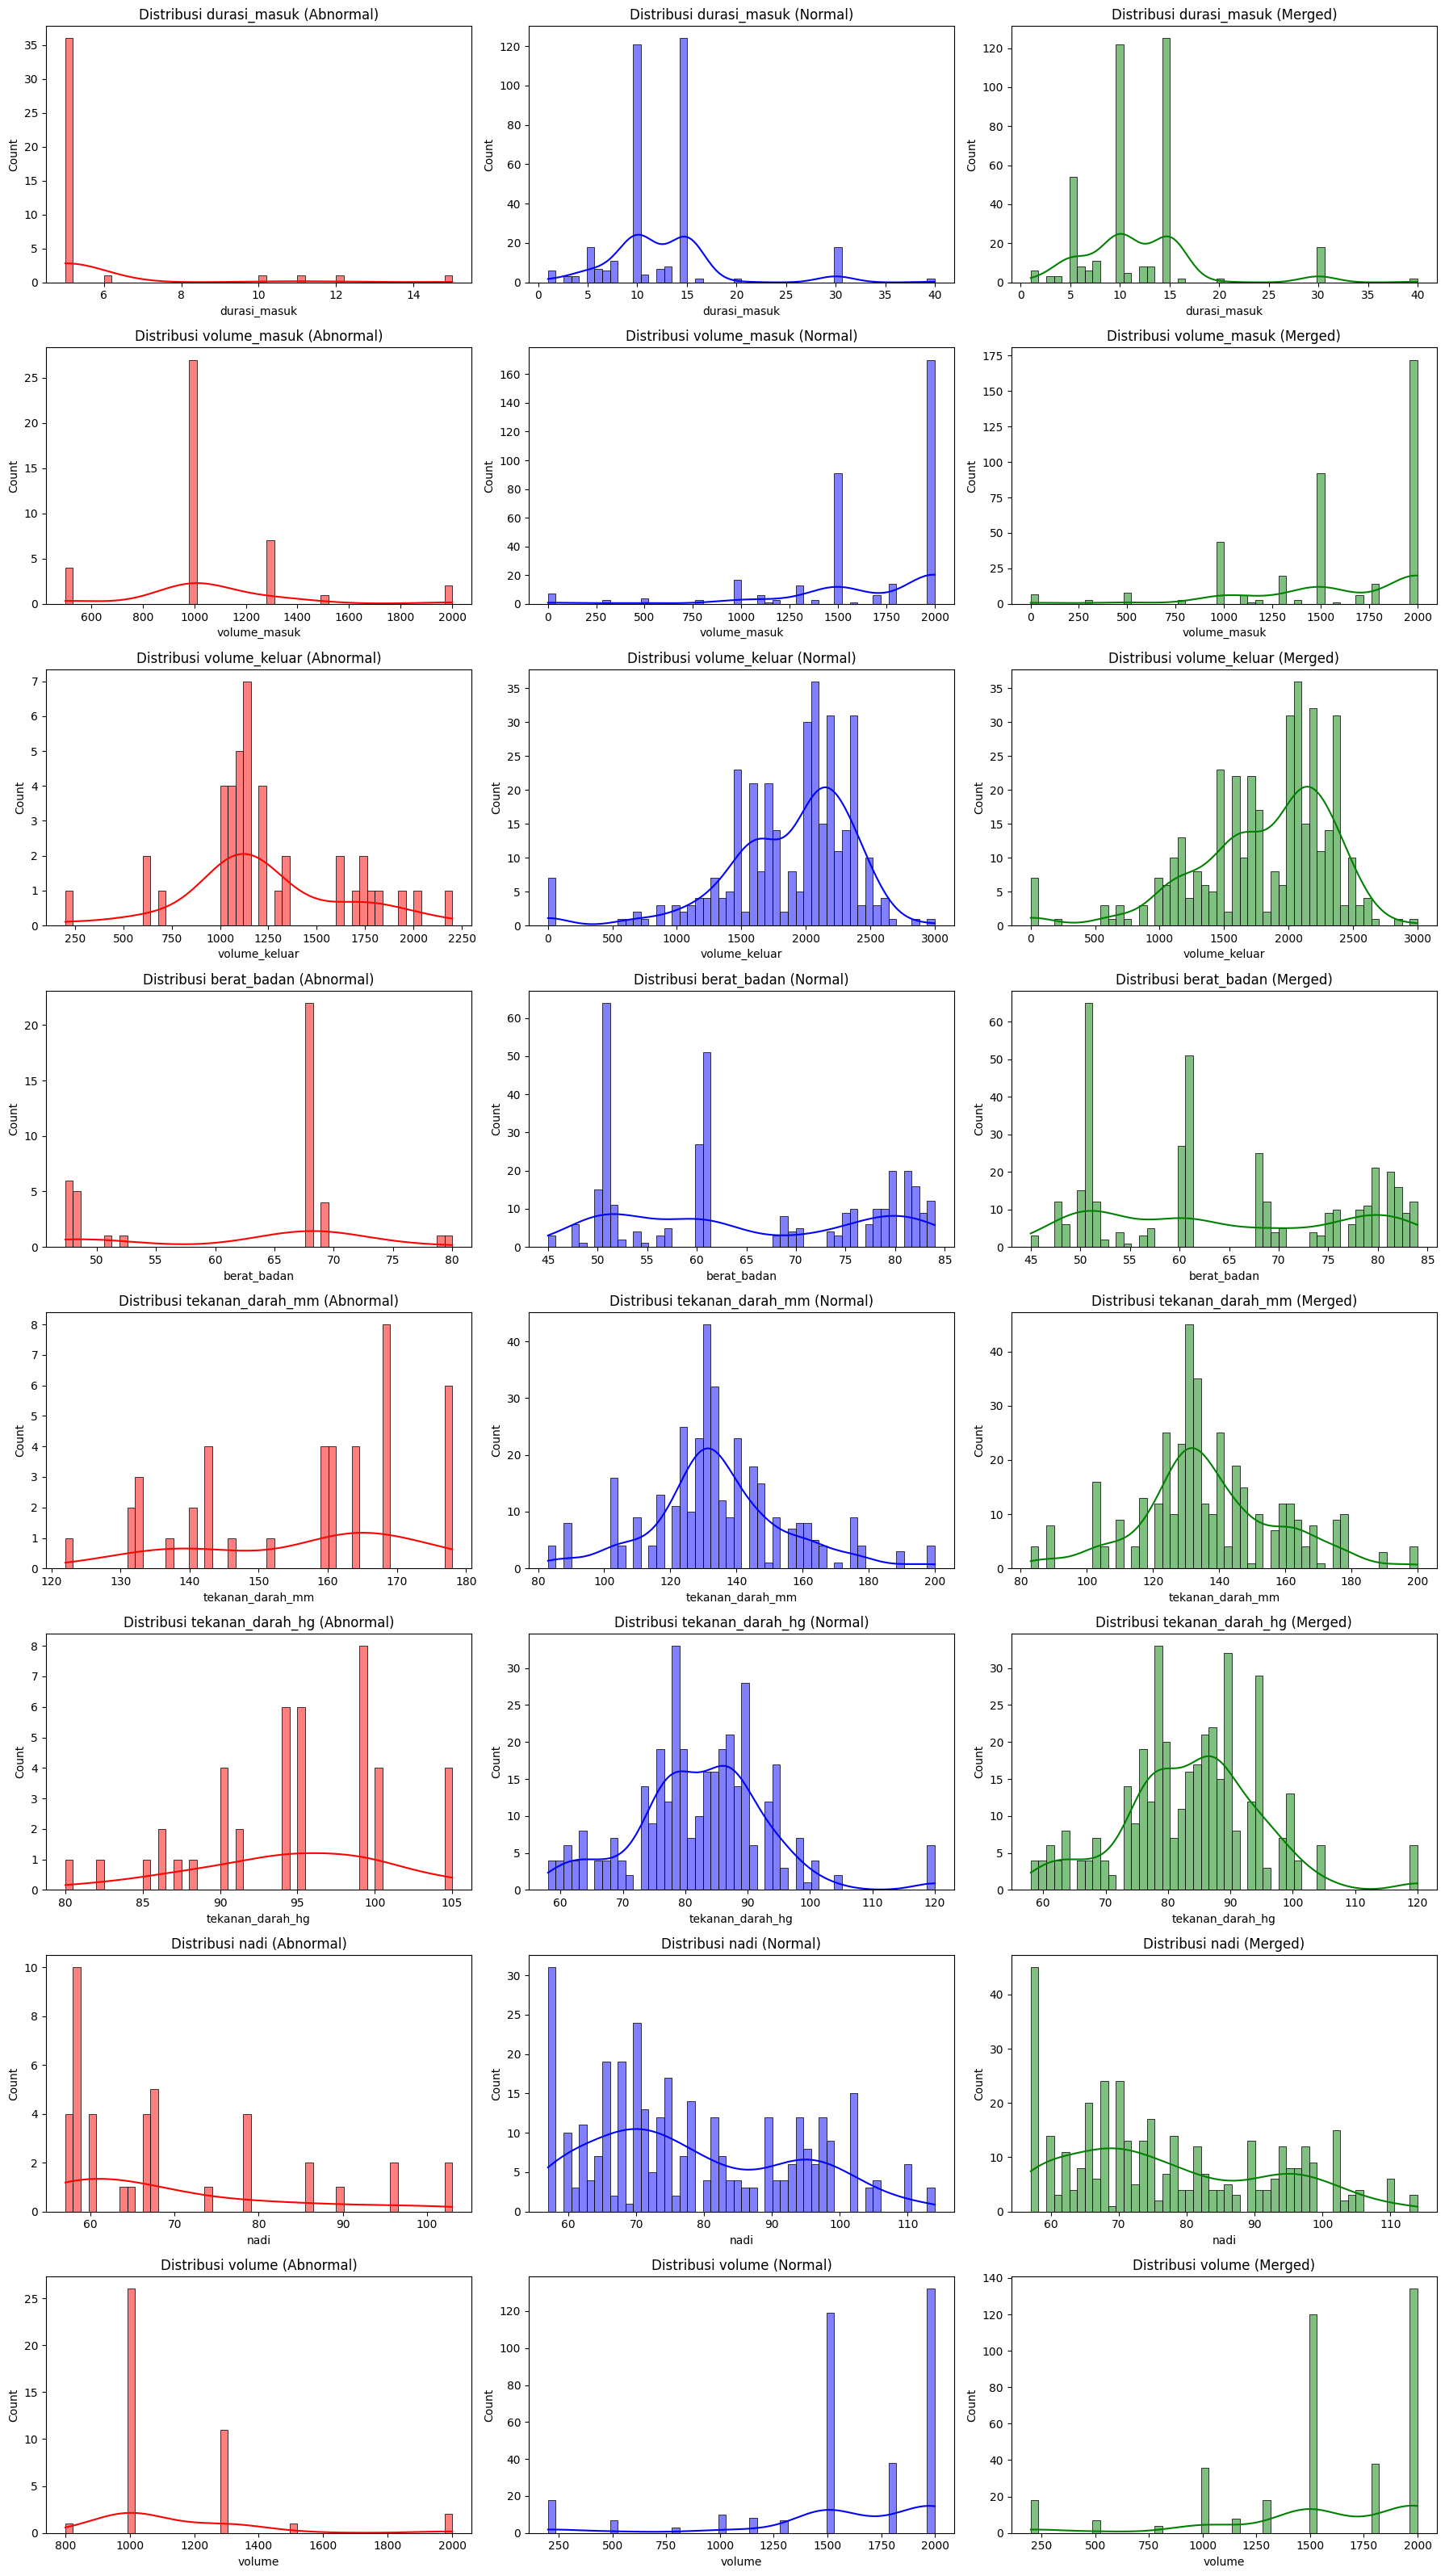

In [ ]:
columns = ["durasi_masuk", "volume_masuk", "volume_keluar", "berat_badan", "tekanan_darah_mm", "tekanan_darah_hg", "nadi", "volume"]

# Setup subplot: 1 baris per kolom, 3 kolom untuk abnormal, normal, merged
fig, axes = plt.subplots(nrows=len(columns), ncols=3, figsize=(18, len(columns) * 4))

# Kalau axes 2D, pastikan indexingnya konsisten
for i, col in enumerate(columns):
    # Plot dataset abnormal
    sns.histplot(x=col, data=abnormal_df, bins=50, kde=True, color='red', ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribusi {col} (Abnormal)')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Count')

    # Plot dataset normal
    sns.histplot(x=col, data=normal_df, bins=50, kde=True, color='blue', ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribusi {col} (Normal)')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Count')

    # Plot dataset merged
    sns.histplot(x=col, data=merged_df, bins=50, kde=True, color='green', ax=axes[i, 2])
    axes[i, 2].set_title(f'Distribusi {col} (Merged)')
    axes[i, 2].set_xlabel(col)
    axes[i, 2].set_ylabel('Count')

# Menyesuaikan layout agar rapi
plt.tight_layout()
plt.show()

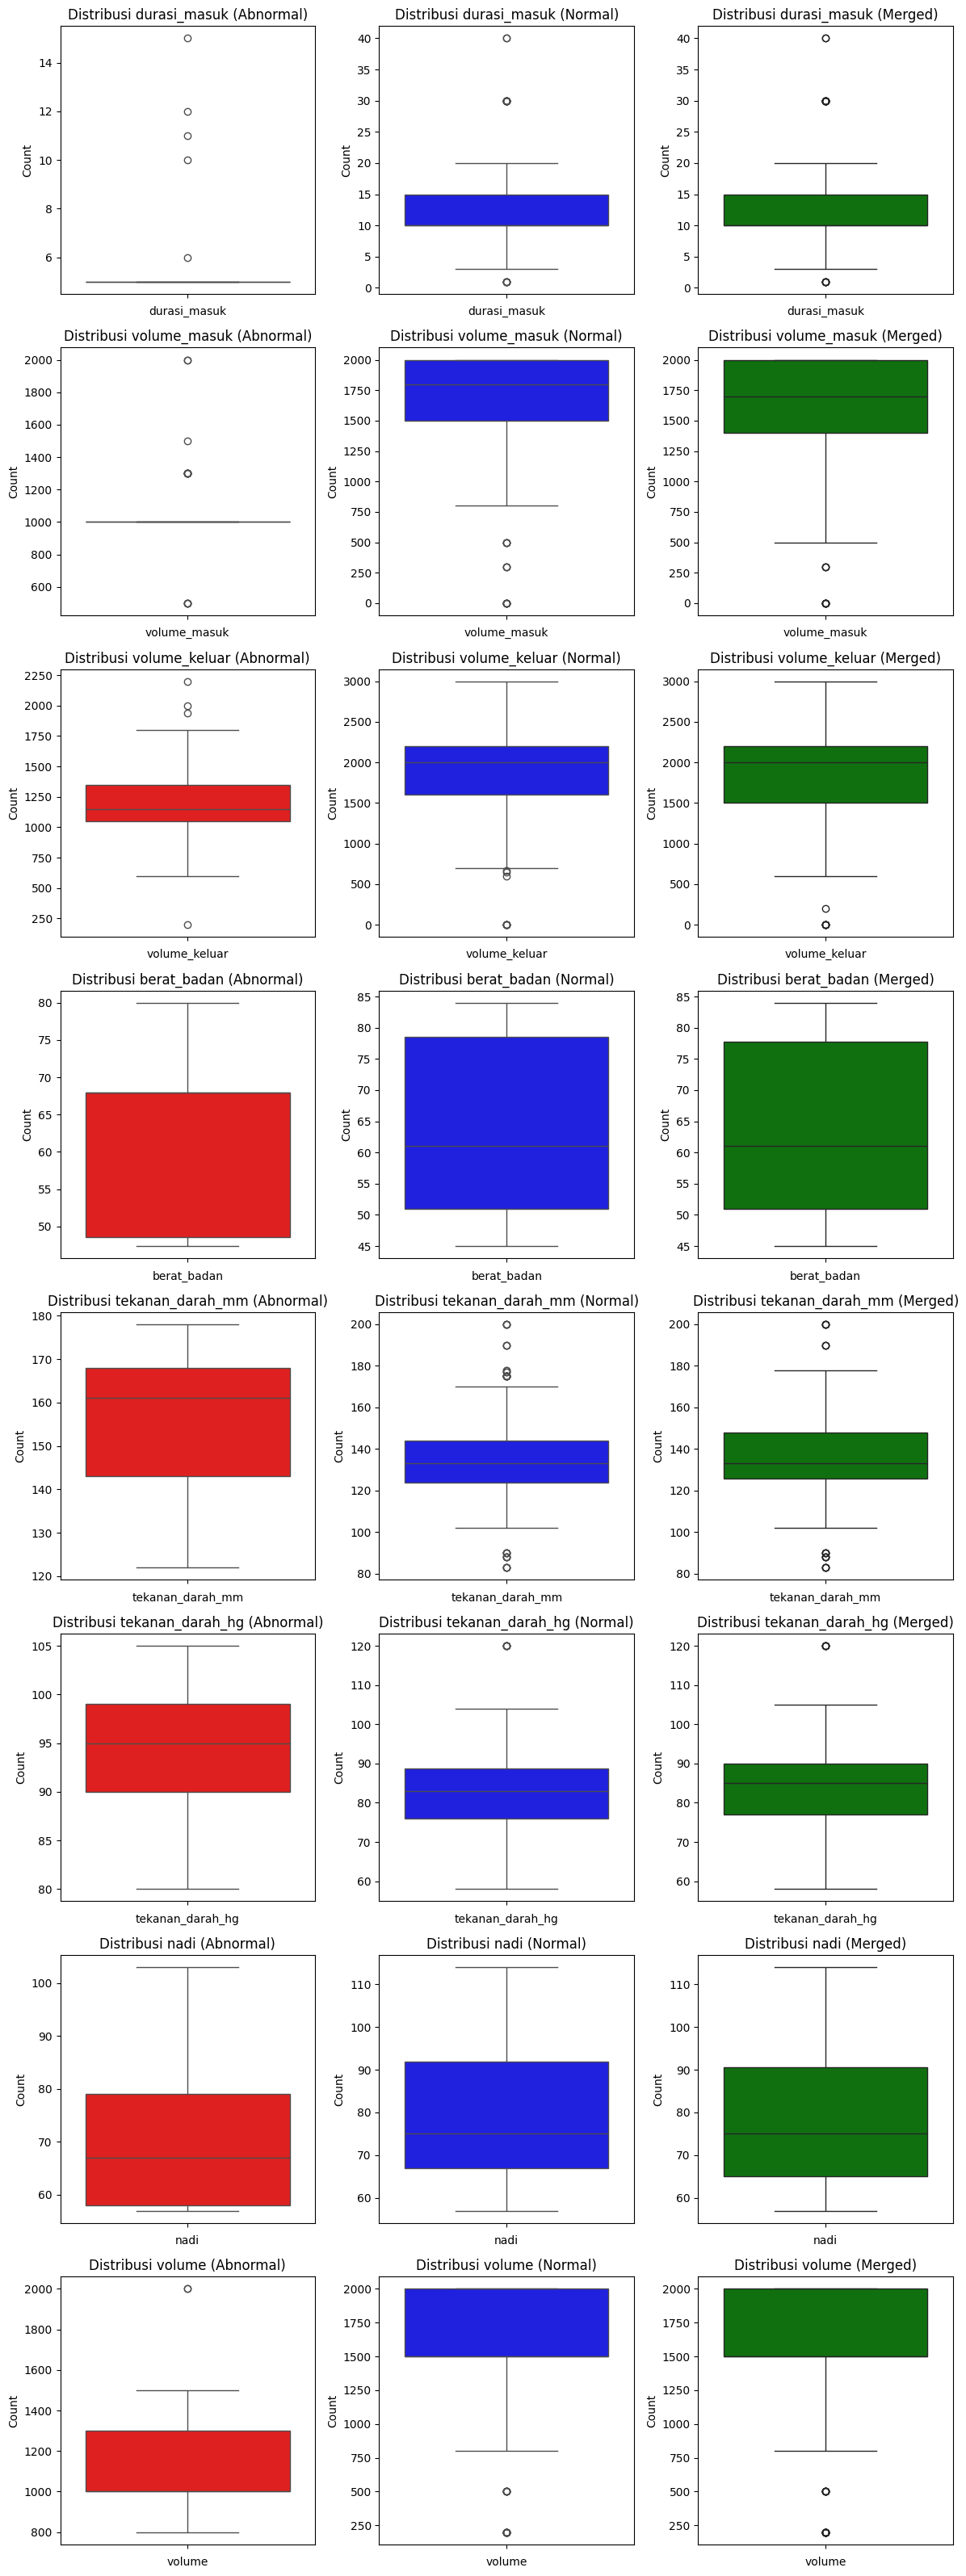

In [ ]:
columns = ["durasi_masuk", "volume_masuk", "volume_keluar", "berat_badan", "tekanan_darah_mm", "tekanan_darah_hg", "nadi", "volume"]

# Setup subplot: 2 kolom, jumlah baris menyesuaikan jumlah kolom (4 variabel, jadi 2x4 = 8 subplot)
fig, axes = plt.subplots(nrows=len(columns), ncols=3, figsize=(12, len(columns) * 4))

# Loop setiap kolom untuk Normal dan Abnormal dataset
for i, col in enumerate(columns):
    # Plot untuk dataset abnormal
    sns.boxplot(y=abnormal_df[col], color='red', ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribusi {col} (Abnormal)')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Count')

    # Plot untuk dataset normal
    sns.boxplot(y=normal_df[col], color='blue', ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribusi {col} (Normal)')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Count')

    # Plot untuk dataset merged
    sns.boxplot(y=merged_df[col], color='green', ax=axes[i, 2])
    axes[i, 2].set_title(f'Distribusi {col} (Merged)')
    axes[i, 2].set_xlabel(col)
    axes[i, 2].set_ylabel('Count')

# Menyesuaikan layout supaya tidak bertumpuk
plt.tight_layout()
plt.show()

In [ ]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Temukan baris yang mengandung outlier
    outlier_rows = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outlier_rows

In [ ]:
columns = ["durasi_masuk", "volume_masuk", "volume_keluar", "berat_badan",
           "tekanan_darah_mm", "tekanan_darah_hg", "nadi", "volume"]

outlier_normal_summary = []
outlier_abnormal_summary = []

for col in columns:
    # Outliers untuk normal
    normal_outliers = detect_outliers(normal_df, col)
    if isinstance(normal_outliers, pd.DataFrame):
        normal_outliers_index = normal_outliers.index
    else:
        normal_outliers_index = normal_outliers  # misal sudah index

    outlier_normal_summary.append({
        "feature": col,
        "n_outliers": len(normal_outliers_index),
        "outlier_values": normal_df.loc[normal_outliers_index, col].tolist()
    })

    # Outliers untuk abnormal
    abnormal_outliers = detect_outliers(abnormal_df, col)
    if isinstance(abnormal_outliers, pd.DataFrame):
        abnormal_outliers_index = abnormal_outliers.index
    else:
        abnormal_outliers_index = abnormal_outliers

    outlier_abnormal_summary.append({
        "feature": col,
        "n_outliers": len(abnormal_outliers_index),
        "outlier_values": abnormal_df.loc[abnormal_outliers_index, col].tolist()
    })

# Buat dua DataFrame terpisah
outliers_normal_df = pd.DataFrame(outlier_normal_summary)
outliers_abnormal_df = pd.DataFrame(outlier_abnormal_summary)

In [ ]:
outliers_normal_df

feature  n_outliers  \
0      durasi_masuk          26   
1      volume_masuk          14   
2     volume_keluar          10   
3       berat_badan           0   
4  tekanan_darah_mm          32   
5  tekanan_darah_hg           6   
6              nadi           0   
7            volume          25   

                                      outlier_values  
0  [30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....  
1  [500.0, 300.0, 300.0, 300.0, 500.0, 500.0, 500...  
2  [665.0, 600.0, 650.0, 1.0, 1.0, 1.0, 1.0, 1.0,...  
3                                                 []  
4  [88.0, 88.0, 88.0, 88.0, 90.0, 90.0, 90.0, 90....  
5         [120.0, 120.0, 120.0, 120.0, 120.0, 120.0]  
6                                                 []  
7  [200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 500...

In [ ]:
outliers_abnormal_df

feature  n_outliers  \
0      durasi_masuk           5   
1      volume_masuk          14   
2     volume_keluar           4   
3       berat_badan           0   
4  tekanan_darah_mm           0   
5  tekanan_darah_hg           0   
6              nadi           0   
7            volume           2   

                                      outlier_values  
0                      [15.0, 10.0, 6.0, 11.0, 12.0]  
1  [1300.0, 1500.0, 500.0, 500.0, 500.0, 500.0, 1...  
2                    [200.0, 1940.0, 2200.0, 2000.0]  
3                                                 []  
4                                                 []  
5                                                 []  
6                                                 []  
7                                   [2000.0, 2000.0]

In [ ]:
outliers_abnormal_df

feature  n_outliers  \
0      durasi_masuk           5   
1      volume_masuk          14   
2     volume_keluar           4   
3       berat_badan           0   
4  tekanan_darah_mm           0   
5  tekanan_darah_hg           0   
6              nadi           0   
7            volume           2   

                                      outlier_values  
0                      [15.0, 10.0, 6.0, 11.0, 12.0]  
1  [1300.0, 1500.0, 500.0, 500.0, 500.0, 500.0, 1...  
2                    [200.0, 1940.0, 2200.0, 2000.0]  
3                                                 []  
4                                                 []  
5                                                 []  
6                                                 []  
7                                   [2000.0, 2000.0]

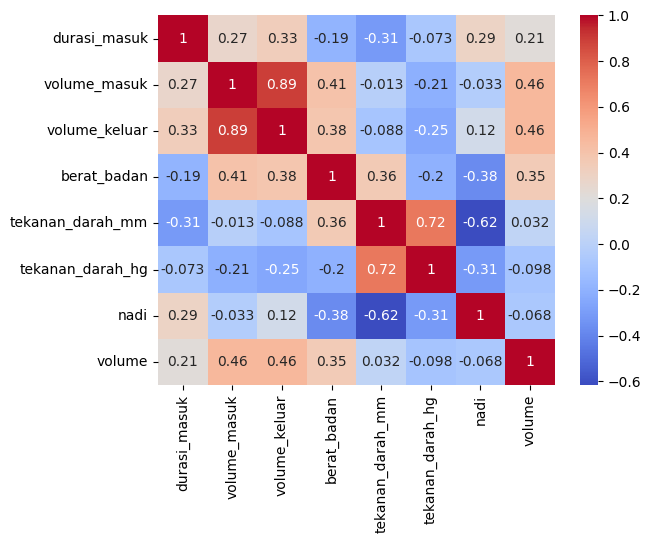

In [ ]:
sns.heatmap(merged_df[columns].corr(), annot=True, cmap='coolwarm')
plt.show()

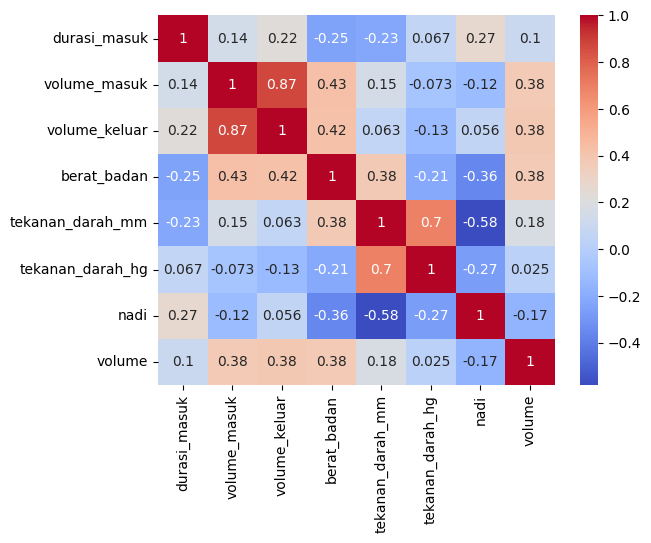

In [ ]:
sns.heatmap(normal_df[columns].corr(), annot=True, cmap='coolwarm')
plt.show()

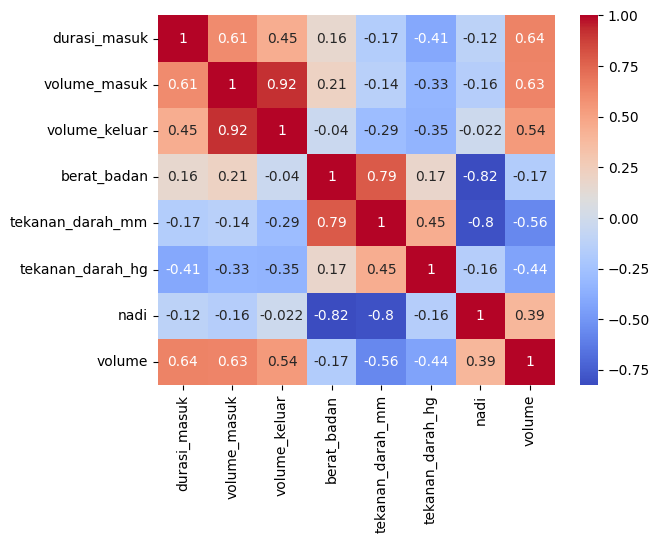

In [ ]:
sns.heatmap(abnormal_df[columns].corr(), annot=True, cmap='coolwarm')
plt.show()

## Data Preprocessing

### Images

1. resize image
2. feature extraction

#### Load Pretrained Model

In [ ]:
# Load Swin Transformer
swin = models.swin_v2_s(pretrained=True).to(device)
for param in swin.parameters():
    param.requires_grad = False
swin.head = torch.nn.Identity()  # Ambil fitur sebelum classifier

# Load CaiT
cait = timm.create_model("cait_s24_224", pretrained=True).to(device)
for param in cait.parameters():
    param.requires_grad = False
cait.head = torch.nn.Identity()

# Load CoAtNet
coatnet = timm.create_model("coatnet_0_rw_224.sw_in1k", pretrained=True).to(device)
for param in coatnet.parameters():
    param.requires_grad = False
coatnet.head = torch.nn.Identity()

# Load YOLOv9
yolov9 = YOLO("yolov9c.pt")
for param in yolov9.parameters():
    param.requires_grad = False

models_dict = {
    "swin": (swin, (224, 224)),
    "cait": (cait, (224, 224)),  # Ubah ke (384, 384) jika mau yang lebih besar
    "coatnet": (coatnet, (224, 224)),
    "yolov9": (yolov9, (640, 640))
}

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Swin_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=Swin_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/swin_v2_s-637d8ceb.pth" to /root/.cache/torch/hub/checkpoints/swin_v2_s-637d8ceb.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 191M/191M [00:01<00:00, 177MB/s]
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with 

model.safetensors:   0%|          | 0.00/188M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/110M [00:00<?, ?B/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 49.4M/49.4M [00:01<00:00, 46.3MB/s]


#### Early Image augmentation for abnormal data

In [ ]:
abnormal_img_path = '/content/drive/MyDrive/dataset/images/images_v2/cropped/abnormal'
output_dir = '/content/drive/MyDrive/dataset/images/images_v2/cropped_augmentation/'

In [ ]:
import os
from PIL import Image
import torchvision.transforms as T
from natsort import natsorted

# Path input dan output
input_dir = '/content/drive/MyDrive/dataset/images/images_v2/cropped/abnormal'
output_dir = '/content/drive/MyDrive/dataset/images/images_v2/temp/'
os.makedirs(output_dir, exist_ok=True)

# Ambil dan urutkan file gambar secara natural
image_files = natsorted([f for f in os.listdir(input_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

# Cari nomor terakhir dari gambar real
real_numbers = [int(f.split('_')[1].split('.')[0]) for f in image_files if 'abnormal_' in f]
start_index = max(real_numbers) + 1 if real_numbers else 1

# Augmentasi: flip vertikal dan perubahan kecerahan/kontras
augmentations = [
    T.RandomVerticalFlip(p=1.0)
]

# Lakukan augmentasi
counter = start_index + 40
for img_file in image_files:
    img_path = os.path.join(input_dir, img_file)
    img = Image.open(img_path).convert('RGB')

    for aug in augmentations:
        augmented_img = aug(img)
        save_path = os.path.join(output_dir, f"abnormal-{counter}.jpg")
        augmented_img.save(save_path)
        counter += 1

print(f"Augmentasi selesai. Total gambar augmentasi ditambahkan: {counter - start_index-40}")


Augmentasi selesai. Total gambar augmentasi ditambahkan: 41


#### Transform and Load Images

In [ ]:
abnormal_img_path = '/content/drive/MyDrive/dataset/images/images_v2/cropped/abnormal'
normal_img_path = '/content/drive/MyDrive/dataset/images/images_v2/cropped/normal'

In [ ]:
image_paths = []
labels = []

for fname in os.listdir(normal_img_path):
    if fname.lower().endswith(('.jpg', '.png')):
        image_paths.append(os.path.join(normal_img_path, fname))
        labels.append(0)

for fname in os.listdir(abnormal_img_path):
    if fname.lower().endswith(('.jpg', '.png')):
        image_paths.append(os.path.join(abnormal_img_path, fname))
        labels.append(1)

In [ ]:
class CombinedImageDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

In [ ]:
# Transformasi sesuai ukuran tiap model
transform_dict = {
    "swin": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ]),
    "cait": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ]),
    "coatnet": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ]),
    "yolov9": transforms.Compose([
        transforms.Resize((640, 640)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ]),
}

batch_size = 16

dataloaders = {}

for model_name, transform in transform_dict.items():
    # Bikin dataset gabungan pakai transform yang sesuai
    combined_dataset = CombinedImageDataset(image_paths, labels, transform=transform)

    # Masukin ke DataLoader
    dataloaders[f"{model_name}_cropped"] = DataLoader(
        combined_dataset,
        batch_size=batch_size,
        shuffle=False
    )

#### Feature Extraction

In [ ]:
def extract_features(model, dataloader, device, model_name):
    features = []
    all_labels = []

    model.eval()
    model.to(device)

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            all_labels.extend(labels.numpy())  # simpan labelnya

            if model_name == "yolov9":
                backbone = model.model.model[:10]
                backbone_output = backbone(images)
                output = backbone_output[-1] if isinstance(backbone_output, (list, tuple)) else backbone_output
            else:
                output = model(images)

            if isinstance(output, (list, tuple)):
                output = output[0]

            if output.dim() > 2:
                output = output.reshape(output.size(0), -1)

            features.append(output.cpu().numpy())

    return np.concatenate(features, axis=0), np.array(all_labels)


In [ ]:
features_dict = {}

for model_name, (model, _) in models_dict.items():
    for image_type in ["cropped"]:
        key = f"{model_name}_{image_type}"
        print(f"Ekstrak fitur dari {key}...")

        features, labels = extract_features(model, dataloaders[key], device, model_name)
        features_dict[key] = {"features": features, "labels": labels}

# Simpan ke .npy
for key, data in features_dict.items():
    np.save(f"{key}_features.npy", data["features"])
    np.save(f"{key}_labels.npy", data["labels"])

print("Feature extraction selesai! üöÄ")

Ekstrak fitur dari swin_cropped...
Ekstrak fitur dari cait_cropped...
Ekstrak fitur dari coatnet_cropped...
Ekstrak fitur dari yolov9_cropped...
Feature extraction selesai! üöÄ


In [ ]:
# Path ke folder tujuan di Google Drive
drive_folder = "/content/drive/MyDrive/dataset/feature-extracted-v4"

# Buat folder jika belum ada
os.makedirs(drive_folder, exist_ok=True)

# Simpan fitur dan label ke file CSV di Drive
for key, data in features_dict.items():
    df = pd.DataFrame(data["features"])
    df['label'] = data["labels"]

    output_path = os.path.join(drive_folder, f"{key}_features.csv")
    df.to_csv(output_path, index=False)

print(f"Semua fitur disimpan ke: {drive_folder} ‚úÖ")


Semua fitur disimpan ke: /content/drive/MyDrive/dataset/feature-extracted-v4 ‚úÖ


In [ ]:
features_dict.keys()

dict_keys(['swin_cropped', 'cait_cropped', 'coatnet_cropped', 'yolov9_cropped'])

In [ ]:
features_dict["swin_cropped"]

{'features': array([[   -0.50603,    -0.30685,      0.2112, ...,    -0.15977,     -0.0408,    -0.61441],
        [   0.064806,    -0.37047,     -0.1392, ...,     0.31319,     0.10874,    -0.30264],
        [   -0.45724,    0.038379,     0.28735, ...,    -0.11277,     -0.1749,    -0.38002],
        ...,
        [    0.48427,   -0.070585,    -0.19653, ...,   -0.090582,     0.19306,    -0.18614],
        [    0.65594,    0.090839,    -0.20494, ...,     0.12699,     0.26644,    -0.18301],
        [ -0.0094642,    0.014297,    -0.48879, ...,   -0.093102,    -0.06689,    -0.69249]], dtype=float32),
 'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
features_dict["swin_cropped"]['features'].shape

(465, 768)

In [ ]:
features_dict["cait_cropped"]['features'].shape

(465, 384)

In [ ]:
features_dict["coatnet_cropped"]['features'].shape

(465, 37632)

In [ ]:
features_dict["yolov9_cropped"]['features'].shape

(465, 204800)

In [ ]:
features_dict["swin_cropped"]['features']

array([[   -0.50603,    -0.30685,      0.2112, ...,    -0.15977,     -0.0408,    -0.61441],
       [   0.064806,    -0.37047,     -0.1392, ...,     0.31319,     0.10874,    -0.30264],
       [   -0.45724,    0.038379,     0.28735, ...,    -0.11277,     -0.1749,    -0.38002],
       ...,
       [    0.48427,   -0.070585,    -0.19653, ...,   -0.090582,     0.19306,    -0.18614],
       [    0.65594,    0.090839,    -0.20494, ...,     0.12699,     0.26644,    -0.18301],
       [ -0.0094642,    0.014297,    -0.48879, ...,   -0.093102,    -0.06689,    -0.69249]], dtype=float32)

In [ ]:
features_dict["cait_cropped"]['features']

array([[     1.0448,    -0.02902,     0.39461, ...,    0.044203,     -2.0382,     -1.1942],
       [    -1.4013,   -0.046521,     -1.0679, ...,     0.56045,     -5.4218,     -0.6594],
       [    -1.5403,     0.66911,    -0.28215, ...,     0.92943,    0.026227,  0.00082542],
       ...,
       [    0.97377,    -0.34898,   -0.020662, ...,     -1.1182,     -2.2265,       1.057],
       [    -1.0543,    -0.60891,    -0.49294, ...,     0.16553,     -2.1653,    -0.17206],
       [   -0.67094,    -0.59271,     0.26531, ...,     0.96048,     -2.0606,    -0.57842]], dtype=float32)

In [ ]:
features_dict["coatnet_cropped"]['features']

array([[   -0.48096,    -0.44823,    -0.25711, ...,    -0.27873,    0.052054,     0.33772],
       [   -0.40034,      1.8587,     0.63568, ...,     -2.2445,    -0.76647,     -1.5543],
       [   -0.51468,     0.80052,    -0.10912, ...,     0.27236,    -0.24668,     0.36417],
       ...,
       [    0.26467,     0.23242,    0.036517, ...,    -0.15485,   -0.075136,     0.43182],
       [    -0.3506,     -1.1308,      -1.193, ...,    0.032937,     0.10534,      1.8206],
       [    -1.0568,      1.3076,     0.26934, ...,    0.018256,     -2.7251,     0.24782]], dtype=float32)

In [ ]:
features_dict["yolov9_cropped"]['features']

array([[   -0.24044,    -0.19886,    -0.20709, ...,    -0.27722,    -0.25646,    -0.27526],
       [   -0.27846,    -0.27815,    -0.27572, ...,    -0.27337,    -0.27812,    -0.26902],
       [   -0.23103,      -0.044,    0.049259, ...,    -0.12106,    -0.16973,    -0.15111],
       ...,
       [   -0.25857,    -0.23537,    -0.24388, ...,   -0.053266,    -0.08339,    -0.08694],
       [   -0.26748,    -0.25643,    -0.21976, ...,   -0.088982,   -0.083533,     -0.0808],
       [   -0.25405,    -0.27729,    -0.27845, ...,   -0.093878,      -0.121,    -0.10504]], dtype=float32)

### Klinis

1. feature engineering
2. feature selection
3. encoding

output:
- final_normal
- final_abnormal

In [ ]:
normal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 342 non-null    float64
 1   foto_cairan        342 non-null    object 
 2   durasi_masuk       342 non-null    float64
 3   foto_cairan_url    342 non-null    object 
 4   volume_masuk       342 non-null    float64
 5   volume_keluar      342 non-null    float64
 6   waktu_masuk        342 non-null    object 
 7   waktu_keluar       342 non-null    object 
 8   berat_badan        342 non-null    float64
 9   tekanan_darah_mm   342 non-null    float64
 10  tekanan_darah_hg   342 non-null    float64
 11  nadi               342 non-null    float64
 12  waktu_penggantian  342 non-null    object 
 13  volume             342 non-null    float64
 14  jenis_kelamin      342 non-null    object 
 15  kondisi            342 non-null    object 
dtypes: float64(9), object(7)
m

In [ ]:
col_unused = ['id', 'foto_cairan', 'foto_cairan_url', 'kondisi']
final_normal = normal_df.drop(columns=col_unused)
final_abnormal = abnormal_df.drop(columns=col_unused)

In [ ]:
final_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   durasi_masuk       342 non-null    float64
 1   volume_masuk       342 non-null    float64
 2   volume_keluar      342 non-null    float64
 3   waktu_masuk        342 non-null    object 
 4   waktu_keluar       342 non-null    object 
 5   berat_badan        342 non-null    float64
 6   tekanan_darah_mm   342 non-null    float64
 7   tekanan_darah_hg   342 non-null    float64
 8   nadi               342 non-null    float64
 9   waktu_penggantian  342 non-null    object 
 10  volume             342 non-null    float64
 11  jenis_kelamin      342 non-null    object 
dtypes: float64(8), object(4)
memory usage: 32.2+ KB


In [ ]:
final_normal['volume_masuk'].value_counts()

volume_masuk
2000.0    170
1500.0     91
1000.0     17
1800.0     14
1300.0     13
1.0         7
1100.0      6
1700.0      6
500.0       4
1200.0      3
300.0       3
1400.0      3
800.0       3
1600.0      1
1150.0      1
Name: count, dtype: int64

In [ ]:
final_abnormal['volume_masuk'].value_counts()

volume_masuk
1000.0    27
1300.0     7
500.0      4
2000.0     2
1500.0     1
Name: count, dtype: int64

In [ ]:
final_normal['volume_masuk'] = final_normal['volume_masuk'].replace(1.0, 1000.0)
final_abnormal['volume_masuk'] = final_abnormal['volume_masuk'].replace(1.0, 1000.0)

In [ ]:
final_normal['volume_masuk'].value_counts()

volume_masuk
2000.0    170
1500.0     91
1000.0     24
1800.0     14
1300.0     13
1100.0      6
1700.0      6
500.0       4
1200.0      3
300.0       3
800.0       3
1400.0      3
1150.0      1
1600.0      1
Name: count, dtype: int64

In [ ]:
final_normal['volume_keluar'].value_counts().sort_index(ascending=True)

volume_keluar
1.0       7
600.0     1
650.0     1
665.0     1
700.0     1
         ..
2620.0    1
2630.0    1
2650.0    1
2850.0    1
3000.0    1
Name: count, Length: 69, dtype: int64

In [ ]:
final_normal['volume_keluar'] = final_normal['volume_keluar'].replace(1.0, 1000.0)
final_abnormal['volume_keluar'] = final_abnormal['volume_keluar'].replace(1.0, 1000.0)

In [ ]:
final_normal['volume_keluar'].value_counts().sort_index(ascending=True)

volume_keluar
600.0     1
650.0     1
665.0     1
700.0     1
730.0     1
         ..
2620.0    1
2630.0    1
2650.0    1
2850.0    1
3000.0    1
Name: count, Length: 68, dtype: int64

In [ ]:
final_normal['waktu_keluar'] = pd.to_datetime(final_normal['waktu_keluar'], format='mixed')
final_normal['waktu_masuk'] = pd.to_datetime(final_normal['waktu_masuk'], format='mixed')
final_normal['waktu_penggantian'] = pd.to_datetime(final_normal['waktu_penggantian'], format='mixed')

final_abnormal['waktu_keluar'] = pd.to_datetime(final_abnormal['waktu_keluar'], format='mixed')
final_abnormal['waktu_masuk'] = pd.to_datetime(final_abnormal['waktu_masuk'], format='mixed')
final_abnormal['waktu_penggantian'] = pd.to_datetime(final_abnormal['waktu_penggantian'], format='mixed')

In [ ]:
# Koreksi seluruh baris yang durasinya negatif
mask = final_normal['waktu_keluar'] < final_normal['waktu_masuk']
final_normal.loc[mask, 'waktu_keluar'] += pd.Timedelta(days=1)

mask_abnormal = final_abnormal['waktu_keluar'] < final_abnormal['waktu_masuk']
final_abnormal.loc[mask_abnormal, 'waktu_keluar'] += pd.Timedelta(days=1)

In [ ]:
def tentukan_shift(jam):
    if 5 <= jam < 11:
        return "pagi"
    elif 11 <= jam < 15:
        return "siang"
    elif 15 <= jam < 19:
        return "sore"
    else:
        return "malam"

In [ ]:
final_normal['jam_masuk'] = final_normal['waktu_masuk'].dt.hour
final_normal['hari_masuk'] = final_normal['waktu_masuk'].dt.dayofweek
final_normal['dwell_time_menit'] = (final_normal['waktu_keluar'] - final_normal['waktu_masuk']).dt.total_seconds() / 60
final_normal['jam_keluar'] = final_normal['waktu_keluar'].dt.hour
final_normal['hari_keluar'] = final_normal['waktu_keluar'].dt.dayofweek
final_normal['selisih_volume'] = final_normal['volume_keluar'] - final_normal['volume_masuk']
final_normal["shift_penggantian"] = final_normal["waktu_penggantian"].dt.hour.apply(tentukan_shift)


final_abnormal['jam_masuk'] = final_abnormal['waktu_masuk'].dt.hour
final_abnormal['hari_masuk'] = final_abnormal['waktu_masuk'].dt.dayofweek
final_abnormal['dwell_time_menit'] = (final_abnormal['waktu_keluar'] - final_abnormal['waktu_masuk']).dt.total_seconds() / 60
final_abnormal['jam_keluar'] = final_abnormal['waktu_keluar'].dt.hour
final_abnormal['hari_keluar'] = final_abnormal['waktu_keluar'].dt.dayofweek
final_abnormal['selisih_volume'] = final_abnormal['volume_keluar'] - final_abnormal['volume_masuk']
final_abnormal["shift_penggantian"] = final_abnormal["waktu_penggantian"].dt.hour.apply(tentukan_shift)

In [ ]:
drop_columns = ['waktu_masuk', 'waktu_keluar', 'waktu_penggantian', 'volume']
final_normal = final_normal.drop(columns=drop_columns)
final_abnormal = final_abnormal.drop(columns=drop_columns)

durasi drain = selisih saat proses mengeluarkan cairan yang sudah ada di dalam dengan proses memasukkan cairan yang baru

dwell time = lama cairan berada di dalam

In [ ]:
final_normal = final_normal.rename(columns={'tekanan_darah_mm': 'systolic', 'tekanan_darah_hg': 'diastolic', 'durasi_masuk': 'durasi_drain_menit'})
final_abnormal = final_abnormal.rename(columns={'tekanan_darah_mm': 'systolic', 'tekanan_darah_hg': 'diastolic', 'durasi_masuk': 'durasi_drain_menit'})

In [ ]:
final_normal.head()

durasi_drain_menit  volume_masuk  volume_keluar  berat_badan  systolic  \
0                15.0        1500.0         1800.0         52.0     134.0   
1                15.0        1500.0         1600.0         51.0     136.0   
2                15.0        1500.0         1500.0         51.0     136.0   
3                15.0        1500.0         1650.0         51.0     136.0   
4                15.0        1500.0         1900.0         51.0     130.0   

   diastolic  nadi jenis_kelamin  jam_masuk  hari_masuk  dwell_time_menit  \
0       85.0  67.0             L          5           3             315.0   
1       96.0  65.0             L         11           3             345.0   
2       96.0  65.0             L         17           3             255.0   
3       96.0  65.0             L         21           3             465.0   
4       90.0  70.0             L         21           3             510.0   

   jam_keluar  hari_keluar  selisih_volume shift_penggantian  
0          11            3           300.0              pagi  
1          17            3           100.0             siang  
2          21            3             0.0              sore  
3           5            4           150.0             malam  
4           5            4           400.0             malam

In [ ]:
final_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   durasi_drain_menit  342 non-null    float64
 1   volume_masuk        342 non-null    float64
 2   volume_keluar       342 non-null    float64
 3   berat_badan         342 non-null    float64
 4   systolic            342 non-null    float64
 5   diastolic           342 non-null    float64
 6   nadi                342 non-null    float64
 7   jenis_kelamin       342 non-null    object 
 8   jam_masuk           342 non-null    int32  
 9   hari_masuk          342 non-null    int32  
 10  dwell_time_menit    342 non-null    float64
 11  jam_keluar          342 non-null    int32  
 12  hari_keluar         342 non-null    int32  
 13  selisih_volume      342 non-null    float64
 14  shift_penggantian   342 non-null    object 
dtypes: float64(9), int32(4), object(2)
memory usage: 34.9+ KB

In [ ]:
# encoding

from sklearn.preprocessing import LabelEncoder

label_encoder_jenis_kelamin = LabelEncoder()
label_encoder_shift = LabelEncoder()

final_normal['jenis_kelamin'] = label_encoder_jenis_kelamin.fit_transform(final_normal['jenis_kelamin'])
final_normal['shift_penggantian'] = label_encoder_shift.fit_transform(final_normal['shift_penggantian'])
final_abnormal['jenis_kelamin'] = label_encoder_jenis_kelamin.transform(final_abnormal['jenis_kelamin'])
final_abnormal['shift_penggantian'] = label_encoder_shift.transform(final_abnormal['shift_penggantian'])

In [ ]:
final_normal.sample(10)

durasi_drain_menit  volume_masuk  volume_keluar  berat_badan  systolic  \
142                10.0        2000.0         2300.0        45.00     140.0   
78                 15.0        2000.0         2300.0        61.05     105.0   
76                 15.0        2000.0         2100.0        61.05     105.0   
119                15.0        1500.0         1600.0        51.00     136.0   
213                10.0        2000.0         2360.0        79.00     146.0   
235                10.0        2000.0         2400.0        81.00     148.0   
42                 15.0        1500.0         1600.0        51.00     127.0   
126                15.0        2000.0         2350.0        61.00     132.0   
240                30.0        1400.0         2400.0        69.00     118.0   
9                  15.0        1500.0         1700.0        51.00     132.0   

     diastolic  nadi  jenis_kelamin  jam_masuk  hari_masuk  dwell_time_menit  \
142       95.0  75.0              1         21           3             507.0   
78        70.0  93.0              1         17           3             285.0   
76        70.0  93.0              1          5           3             350.0   
119       85.0  75.0              0         17           3             285.0   
213       82.0  64.0              0         22           3             428.0   
235       85.0  71.0              0         22           3             440.0   
42        87.0  70.0              0         21           3             465.0   
126       84.0  94.0              1         11           3             290.0   
240       88.0  81.0              1          6           3              30.0   
9         89.0  68.0              0         17           3             270.0   

     jam_keluar  hari_keluar  selisih_volume  shift_penggantian  
142           6            4           300.0                  0  
78           22            3           300.0                  3  
76           11            3           100.0                  1  
119          22            3           100.0                  3  
213           5            4           360.0                  0  
235           5            4           400.0                  0  
42            5            4           100.0                  0  
126          16            3           350.0                  1  
240           6            3          1000.0                  1  
9            21            3           200.0                  3

In [ ]:
final_abnormal.sample(10)

durasi_drain_menit  volume_masuk  volume_keluar  berat_badan  systolic  \
21                 5.0        1000.0         1125.0        68.00     161.0   
23                 5.0        1000.0         1350.0        68.00     168.0   
27                 5.0        1000.0         1200.0        68.00     160.0   
16                 5.0        1000.0         1100.0        68.00     178.0   
25                 5.0        1000.0         1200.0        68.00     168.0   
22                 5.0        1000.0         1150.0        68.00     168.0   
3                  5.0         500.0          600.0        48.58     140.0   
0                  5.0        1300.0         1790.0        48.35     122.0   
15                 5.0        1000.0         1100.0        68.00     178.0   
10                 5.0        1300.0         1735.0        47.35     133.0   

    diastolic   nadi  jenis_kelamin  jam_masuk  hari_masuk  dwell_time_menit  \
21       90.0   57.0              0         20           3             480.0   
23       95.0   58.0              0          9           3             291.0   
27      100.0   60.0              0         10           3             268.0   
16       94.0   58.0              0         14           3             339.0   
25       95.0   58.0              0         20           3             460.0   
22       95.0   58.0              0          4           3             322.0   
3        95.0  103.0              1         10           3             289.0   
0        87.0   90.0              1         22           3             480.0   
15       94.0   58.0              0          4           3             330.0   
10       86.0   96.0              1          7           3             240.0   

    jam_keluar  hari_keluar  selisih_volume  shift_penggantian  
21           4            4           125.0                  0  
23          14            3           350.0                  1  
27          14            3           200.0                  1  
16          20            3           100.0                  3  
25           4            4           200.0                  0  
22           9            3           150.0                  0  
3           15            3           100.0                  1  
0            6            4           490.0                  0  
15           9            3           100.0                  0  
10          11            3           435.0                  1

In [ ]:
final_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   durasi_drain_menit  342 non-null    float64
 1   volume_masuk        342 non-null    float64
 2   volume_keluar       342 non-null    float64
 3   berat_badan         342 non-null    float64
 4   systolic            342 non-null    float64
 5   diastolic           342 non-null    float64
 6   nadi                342 non-null    float64
 7   jenis_kelamin       342 non-null    int64  
 8   jam_masuk           342 non-null    int32  
 9   hari_masuk          342 non-null    int32  
 10  dwell_time_menit    342 non-null    float64
 11  jam_keluar          342 non-null    int32  
 12  hari_keluar         342 non-null    int32  
 13  selisih_volume      342 non-null    float64
 14  shift_penggantian   342 non-null    int64  
dtypes: float64(9), int32(4), int64(2)
memory usage: 34.9 KB


In [ ]:
final_normal.to_csv("/content/drive/MyDrive/dataset/tabular/final_normal_FIX.csv", index=False)
final_abnormal.to_csv("/content/drive/MyDrive/dataset/tabular/final_abnormal_before_aug_V2.csv", index=False)

### Data Manual Augmentation for abnormal data klinis

#### Klinis

In [ ]:
final_abnormal = pd.read_csv("/content/drive/MyDrive/dataset/tabular/final_abnormal_before_aug_V2.csv")

In [ ]:
final_abnormal

durasi_drain_menit  volume_masuk  volume_keluar  berat_badan  systolic  \
0                  5.0        1300.0         1790.0        48.35     122.0   
1                 15.0        1500.0         1800.0        51.00     133.0   
2                  5.0         500.0          200.0        48.58     140.0   
3                  5.0         500.0          600.0        48.58     140.0   
4                  5.0         500.0          600.0        48.16     132.0   
5                  5.0         500.0          700.0        48.16     132.0   
6                  5.0        1300.0         1610.0        47.90     143.0   
7                  5.0        1300.0         1635.0        47.90     143.0   
8                  5.0        1300.0         1680.0        47.90     143.0   
9                  5.0        1300.0         1940.0        47.90     143.0   
10                 5.0        1300.0         1735.0        47.35     133.0   
11                 5.0        1300.0         1755.0        47.35     133.0   
12                10.0        1000.0         1050.0        68.00     178.0   
13                 5.0        1000.0         1150.0        68.00     178.0   
14                 5.0        1000.0         1135.0        68.00     178.0   
15                 5.0        1000.0         1100.0        68.00     178.0   
16                 5.0        1000.0         1100.0        68.00     178.0   
17                 5.0        1000.0         1200.0        68.00     178.0   
18                 5.0        1000.0         1150.0        68.00     161.0   
19                 5.0        1000.0         1300.0        68.00     161.0   
20                 6.0        1000.0         1000.0        68.00     161.0   
21                 5.0        1000.0         1125.0        68.00     161.0   
22                 5.0        1000.0         1150.0        68.00     168.0   
23                 5.0        1000.0         1350.0        68.00     168.0   
24                 5.0        1000.0         1000.0        68.00     168.0   
25                 5.0        1000.0         1200.0        68.00     168.0   
26                 5.0        1000.0         1000.0        68.00     160.0   
27                 5.0        1000.0         1200.0        68.00     160.0   
28                 5.0        1000.0         1100.0        68.00     160.0   
29                 5.0        1000.0         1100.0        68.00     160.0   
30                 5.0        1000.0         1150.0        68.00     164.0   
31                 5.0        1000.0         1050.0        68.00     164.0   
32                 5.0        1000.0         1050.0        68.00     164.0   
33                 5.0        1000.0         1050.0        68.00     164.0   
34                11.0        2000.0         2200.0        80.00     152.0   
35                12.0        2000.0         2000.0        79.00     146.0   
36                 5.0        1000.0         1000.0        69.00     168.0   
37                 5.0        1000.0         1150.0        69.00     168.0   
38                 5.0        1000.0         1200.0        69.00     168.0   
39                 5.0        1000.0         1100.0        69.00     168.0   
40                 5.0        1000.0         1350.0        52.00     137.0   

    diastolic   nadi  jenis_kelamin  jam_masuk  hari_masuk  dwell_time_menit  \
0        87.0   90.0              1         22           3             480.0   
1        88.0   68.0              0         22           3             450.0   
2        95.0  103.0              1          5           3             398.0   
3        95.0  103.0              1         10           3             289.0   
4        91.0   86.0              1          9           3              11.0   
5        91.0   86.0              1          9           3             346.0   
6        99.0   79.0              1          6           3             280.0   
7        99.0   79.0              1         12           3             285.0   
8      

In [ ]:
def augment_data(df_real):
    augmented_rows = []
    idx = 41  # index mulai untuk augmented data

    for _, row in df_real.iterrows():
        for i in range(2):  # buat 2 augmentasi per baris
            new_row = row.copy()

            if i == 0:  # Augmentasi 1: nilai sedikit lebih tinggi
                new_row['volume_keluar'] *= 1.02
                new_row['berat_badan'] *= 1.005
                new_row['systolic'] += 2
                new_row['diastolic'] += 1
                new_row['nadi'] += 1
            else:  # Augmentasi 2: nilai sedikit lebih rendah
                new_row['volume_keluar'] *= 0.98
                new_row['berat_badan'] *= 0.995
                new_row['systolic'] -= 2
                new_row['diastolic'] -= 1
                new_row['nadi'] -= 1

            # Hitung ulang selisih volume
            new_row['selisih_volume'] = new_row['volume_keluar'] - new_row['volume_masuk']

            # Ganti index
            new_row.name = idx
            idx += 1

            augmented_rows.append(new_row)

    df_augmented = pd.DataFrame(augmented_rows)

    return df_augmented

In [ ]:
df_augmented = augment_data(final_abnormal)
df_combined = pd.concat([final_abnormal, df_augmented]).reset_index(drop=True)

In [ ]:
df_combined

durasi_drain_menit  volume_masuk  volume_keluar  berat_badan  systolic  \
0                   5.0        1300.0         1790.0       48.350     122.0   
1                  15.0        1500.0         1800.0       51.000     133.0   
2                   5.0         500.0          200.0       48.580     140.0   
3                   5.0         500.0          600.0       48.580     140.0   
4                   5.0         500.0          600.0       48.160     132.0   
..                  ...           ...            ...          ...       ...   
118                 5.0        1000.0         1176.0       68.655     166.0   
119                 5.0        1000.0         1122.0       69.345     170.0   
120                 5.0        1000.0         1078.0       68.655     166.0   
121                 5.0        1000.0         1377.0       52.260     139.0   
122                 5.0        1000.0         1323.0       51.740     135.0   

     diastolic   nadi  jenis_kelamin  jam_masuk  hari_masuk  dwell_time_menit  \
0         87.0   90.0            1.0       22.0         3.0             480.0   
1         88.0   68.0            0.0       22.0         3.0             450.0   
2         95.0  103.0            1.0        5.0         3.0             398.0   
3         95.0  103.0            1.0       10.0         3.0             289.0   
4         91.0   86.0            1.0        9.0         3.0              11.0   
..         ...    ...            ...        ...         ...               ...   
118      104.0   67.0            0.0       16.0         3.0             304.0   
119      106.0   69.0            0.0       21.0         3.0             405.0   
120      104.0   67.0            0.0       21.0         3.0             405.0   
121       81.0   75.0            0.0       11.0         3.0             295.0   
122       79.0   73.0            0.0       11.0         3.0             295.0   

     jam_keluar  hari_keluar  selisih_volume  shift_penggantian  
0           6.0          4.0           490.0                0.0  
1           5.0          4.0           300.0                0.0  
2          11.0          3.0          -300.0                1.0  
3          15.0          3.0           100.0                1.0  
4           9.0          3.0           100.0                1.0  
..          ...          ...             ...                ...  
118        21.0          3.0           176.0                3.0  
119         4.0          4.0           122.0                0.0  
120         4.0          4.0            78.0                0.0  
121        16.0          3.0           377.0                1.0  
122        16.0          3.0           323.0                1.0  

[123 rows x 15 columns]

In [ ]:
df_combined.to_csv("/content/drive/MyDrive/dataset/tabular/final_abnormal_after_aug_V2.csv", index=False)

## Early Fused

outputnya:
- fused_swin
- fused_cait
- fused_coatnet
- fused_yolov9

sudah disave pada folder dataset

In [ ]:
swin_features = pd.read_csv("/content/drive/MyDrive/dataset/feature-extracted-v4/swin_cropped_features.csv")
cait_features = pd.read_csv("/content/drive/MyDrive/dataset/feature-extracted-v4/cait_cropped_features.csv")
coatnet_features = pd.read_csv("/content/drive/MyDrive/dataset/feature-extracted-v4/coatnet_cropped_features.csv")
yolov9_features = pd.read_csv("/content/drive/MyDrive/dataset/feature-extracted-v4/yolov9_cropped_features.csv")

In [ ]:
coatnet_features.isna().sum().sum()

np.int64(0)

In [ ]:
swin_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Columns: 769 entries, 0 to label
dtypes: float64(768), int64(1)
memory usage: 2.7 MB


In [ ]:
final_normal = pd.read_csv("/content/drive/MyDrive/dataset/tabular/final_normal_before_aug.csv")
final_abnormal = pd.read_csv("/content/drive/MyDrive/dataset/tabular/final_abnormal_after_aug.csv")

In [ ]:
final_normal.isna().sum().sum()

np.int64(0)

In [ ]:
final_abnormal.isna().sum().sum()

np.int64(0)

In [ ]:
final_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   durasi_drain_menit  342 non-null    float64
 1   volume_masuk        342 non-null    float64
 2   volume_keluar       342 non-null    float64
 3   berat_badan         342 non-null    float64
 4   systolic            342 non-null    float64
 5   diastolic           342 non-null    float64
 6   nadi                342 non-null    float64
 7   jenis_kelamin       342 non-null    int64  
 8   jam_masuk           342 non-null    int64  
 9   hari_masuk          342 non-null    int64  
 10  dwell_time_menit    342 non-null    float64
 11  jam_keluar          342 non-null    int64  
 12  hari_keluar         342 non-null    int64  
 13  selisih_volume      342 non-null    float64
 14  shift_penggantian   342 non-null    int64  
dtypes: float64(9), int64(6)
memory usage: 40.2 KB


In [ ]:
final_abnormal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   durasi_drain_menit  123 non-null    float64
 1   volume_masuk        123 non-null    float64
 2   volume_keluar       123 non-null    float64
 3   berat_badan         123 non-null    float64
 4   systolic            123 non-null    float64
 5   diastolic           123 non-null    float64
 6   nadi                123 non-null    float64
 7   jenis_kelamin       123 non-null    float64
 8   jam_masuk           123 non-null    float64
 9   hari_masuk          123 non-null    float64
 10  dwell_time_menit    123 non-null    float64
 11  jam_keluar          123 non-null    float64
 12  hari_keluar         123 non-null    float64
 13  selisih_volume      123 non-null    float64
 14  shift_penggantian   123 non-null    float64
dtypes: float64(15)
memory usage: 14.5 KB


In [ ]:
 swin_features.shape

(465, 769)

In [ ]:
final_normal["label"] = 0
final_abnormal["label"] = 1
tabular_combined = pd.concat([final_normal, final_abnormal], ignore_index=True)

In [ ]:
tabular_combined.isna().sum().sum()

np.int64(0)

In [ ]:
tabular_combined.shape

(465, 16)

In [ ]:
tabular_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   durasi_drain_menit  465 non-null    float64
 1   volume_masuk        465 non-null    float64
 2   volume_keluar       465 non-null    float64
 3   berat_badan         465 non-null    float64
 4   systolic            465 non-null    float64
 5   diastolic           465 non-null    float64
 6   nadi                465 non-null    float64
 7   jenis_kelamin       465 non-null    float64
 8   jam_masuk           465 non-null    float64
 9   hari_masuk          465 non-null    float64
 10  dwell_time_menit    465 non-null    float64
 11  jam_keluar          465 non-null    float64
 12  hari_keluar         465 non-null    float64
 13  selisih_volume      465 non-null    float64
 14  shift_penggantian   465 non-null    float64
 15  label               465 non-null    int64  
dtypes: float

In [ ]:
tabular_combined[tabular_combined['label']==1]

durasi_drain_menit  volume_masuk  volume_keluar  berat_badan  systolic  \
342                 5.0        1300.0         1790.0       48.350     122.0   
343                15.0        1500.0         1800.0       51.000     133.0   
344                 5.0         500.0          200.0       48.580     140.0   
345                 5.0         500.0          600.0       48.580     140.0   
346                 5.0         500.0          600.0       48.160     132.0   
..                  ...           ...            ...          ...       ...   
460                 5.0        1000.0         1176.0       68.655     166.0   
461                 5.0        1000.0         1122.0       69.345     170.0   
462                 5.0        1000.0         1078.0       68.655     166.0   
463                 5.0        1000.0         1377.0       52.260     139.0   
464                 5.0        1000.0         1323.0       51.740     135.0   

     diastolic   nadi  jenis_kelamin  jam_masuk  hari_masuk  dwell_time_menit  \
342       87.0   90.0            1.0       22.0         3.0             480.0   
343       88.0   68.0            0.0       22.0         3.0             450.0   
344       95.0  103.0            1.0        5.0         3.0             398.0   
345       95.0  103.0            1.0       10.0         3.0             289.0   
346       91.0   86.0            1.0        9.0         3.0              11.0   
..         ...    ...            ...        ...         ...               ...   
460      104.0   67.0            0.0       16.0         3.0             304.0   
461      106.0   69.0            0.0       21.0         3.0             405.0   
462      104.0   67.0            0.0       21.0         3.0             405.0   
463       81.0   75.0            0.0       11.0         3.0             295.0   
464       79.0   73.0            0.0       11.0         3.0             295.0   

     jam_keluar  hari_keluar  selisih_volume  shift_penggantian  label  
342         6.0          4.0           490.0                0.0      1  
343         5.0          4.0           300.0                0.0      1  
344        11.0          3.0          -300.0                1.0      1  
345        15.0          3.0           100.0                1.0      1  
346         9.0          3.0           100.0                1.0      1  
..          ...          ...             ...                ...    ...  
460        21.0          3.0           176.0                3.0      1  
461         4.0          4.0           122.0                0.0      1  
462         4.0          4.0            78.0                0.0      1  
463        16.0          3.0           377.0                1.0      1  
464        16.0          3.0           323.0                1.0      1  

[123 rows x 16 columns]

In [ ]:
fused_swin

0         1         2         3         4         5         6  \
0   -0.506028 -0.306852  0.211196 -0.260530  0.831871  0.162391  0.393585   
1    0.064806 -0.370467 -0.139201 -0.038765  1.311397 -0.743221  0.065842   
2   -0.457242  0.038379  0.287351  0.081722  0.180021 -0.211764 -0.230158   
3   -0.588846  0.403877 -0.015955  0.072322  1.048142 -0.587832 -0.169320   
4   -0.217971  0.376933 -0.054559 -0.053777  1.210200 -0.577169  0.307845   
..        ...       ...       ...       ...       ...       ...       ...   
460  0.212368  1.027027 -0.036088  0.180537  1.251029 -0.953666  0.239377   
461  0.308849  0.317390 -0.304791 -0.000796  1.350391 -0.335057  0.189346   
462  0.484268 -0.070585 -0.196532 -0.125631  1.400015 -0.667088  0.338817   
463  0.655937  0.090839 -0.204943  0.166888  1.523741 -0.500935  0.151181   
464 -0.009464  0.014297 -0.488792 -0.391382  0.691020 -0.041253  0.061876   

            7         8         9  ...  nadi  jenis_kelamin  jam_masuk  \
0   -0.171429  0.340640  0.698110  ...  67.0            0.0        5.0   
1   -0.021887  0.011268  0.294051  ...  65.0            0.0       11.0   
2   -0.435847 -0.075014 -0.617530  ...  65.0            0.0       17.0   
3    0.479973  0.468464  0.205951  ...  65.0            0.0       21.0   
4    0.330822  0.361465  0.621866  ...  70.0            0.0       21.0   
..        ...       ...       ...  ...   ...            ...        ...   
460  0.123341 -0.023377  0.725772  ...  67.0            0.0       16.0   
461  0.596545 -0.225551  0.427829  ...  69.0            0.0       21.0   
462  0.361950 -0.177575 -0.230169  ...  67.0            0.0       21.0   
463  0.237213 -0.204672  0.188243  ...  75.0            0.0       11.0   
464  0.199065 -0.494466  0.056977  ...  73.0            0.0       11.0   

     hari_masuk  dwell_time_menit  jam_keluar  hari_keluar  selisih_volume  \
0           3.0             315.0        11.0          3.0           300.0   
1           3.0             345.0        17.0          3.0           100.0   
2           3.0             255.0        21.0          3.0             0.0   
3           3.0             465.0         5.0          4.0           150.0   
4           3.0             510.0         5.0          4.0           400.0   
..          ...               ...         ...          ...             ...   
460         3.0             304.0        21.0          3.0           176.0   
461         3.0             405.0         4.0          4.0           122.0   
462         3.0             405.0         4.0          4.0            78.0   
463         3.0             295.0        16.0          3.0           377.0   
464         3.0             295.0        16.0          3.0           323.0   

     shift_penggantian  label  
0                  1.0      0  
1                  2.0      0  
2                  3.0      0  
3                  0.0      0  
4                  0.0      0  
..                 ...    ...  
460                3.0      1  
461                0.0      1  
462                0.0      1  
463                1.0      1  
464                1.0      1  

[465 rows x 784 columns]

In [ ]:
tabular_features = tabular_combined.drop(columns=["label"])

# Gabungkan tabular features dan image features
# Baris sudah sesuai
fused_swin = pd.concat([swin_features.drop(columns=["label"]), tabular_features], axis=1)
fused_swin["label"] = swin_features["label"]

fused_coatnet = pd.concat([coatnet_features.drop(columns=["label"]), tabular_features], axis=1)
fused_coatnet["label"] = coatnet_features["label"]

fused_cait = pd.concat([cait_features.drop(columns=["label"]), tabular_features], axis=1)
fused_cait["label"] = cait_features["label"]

fused_yolov9 = pd.concat([yolov9_features.drop(columns=["label"]), tabular_features], axis=1)
fused_yolov9["label"] = yolov9_features["label"]

In [ ]:
fused_swin.iloc[:, -16:]

durasi_drain_menit  volume_masuk  volume_keluar  berat_badan  systolic  \
0                  15.0        1500.0         1800.0       52.000     134.0   
1                  15.0        1500.0         1600.0       51.000     136.0   
2                  15.0        1500.0         1500.0       51.000     136.0   
3                  15.0        1500.0         1650.0       51.000     136.0   
4                  15.0        1500.0         1900.0       51.000     130.0   
..                  ...           ...            ...          ...       ...   
460                 5.0        1000.0         1176.0       68.655     166.0   
461                 5.0        1000.0         1122.0       69.345     170.0   
462                 5.0        1000.0         1078.0       68.655     166.0   
463                 5.0        1000.0         1377.0       52.260     139.0   
464                 5.0        1000.0         1323.0       51.740     135.0   

     diastolic  nadi  jenis_kelamin  jam_masuk  hari_masuk  dwell_time_menit  \
0         85.0  67.0            0.0        5.0         3.0             315.0   
1         96.0  65.0            0.0       11.0         3.0             345.0   
2         96.0  65.0            0.0       17.0         3.0             255.0   
3         96.0  65.0            0.0       21.0         3.0             465.0   
4         90.0  70.0            0.0       21.0         3.0             510.0   
..         ...   ...            ...        ...         ...               ...   
460      104.0  67.0            0.0       16.0         3.0             304.0   
461      106.0  69.0            0.0       21.0         3.0             405.0   
462      104.0  67.0            0.0       21.0         3.0             405.0   
463       81.0  75.0            0.0       11.0         3.0             295.0   
464       79.0  73.0            0.0       11.0         3.0             295.0   

     jam_keluar  hari_keluar  selisih_volume  shift_penggantian  label  
0          11.0          3.0           300.0                1.0      0  
1          17.0          3.0           100.0                2.0      0  
2          21.0          3.0             0.0                3.0      0  
3           5.0          4.0           150.0                0.0      0  
4           5.0          4.0           400.0                0.0      0  
..          ...          ...             ...                ...    ...  
460        21.0          3.0           176.0                3.0      1  
461         4.0          4.0           122.0                0.0      1  
462         4.0          4.0            78.0                0.0      1  
463        16.0          3.0           377.0                1.0      1  
464        16.0          3.0           323.0                1.0      1  

[465 rows x 16 columns]

struktur tabel fused:
16 kolom terakhir punyanya data klinis.

In [ ]:
fused_swin.to_csv("/content/drive/MyDrive/dataset/swin_fused.csv", index=False)
fused_cait.to_csv("/content/drive/MyDrive/dataset/cait_fused.csv", index=False)
fused_coatnet.to_csv("/content/drive/MyDrive/dataset/coatnet_fused.csv", index=False)
fused_yolov9.to_csv("/content/drive/MyDrive/dataset/yolov9_fused.csv", index=False)

In [ ]:
fused_swin.isna().sum().sum()

np.int64(0)

## Output (blm update)

file csv di drive folder dataset/feature-extracted <br>

1.  swin_cropped_normal
2.  swin_cropped_abnormal
3.  cait_cropped_normal
4.  cait_cropped_abnormal
5.  coatnet_cropped_normal
6.  coatnet_cropped_abnormal
7.  yolov9_cropped_normal
8.  yolov9_cropped_abnormal